In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error
import math
import seaborn as sns
from sklearn.model_selection import train_test_split 
import cufflinks as cf
from plotly.offline import iplot,plot,init_notebook_mode,download_plotlyjs 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import pacf,acf
from adFuller import stationarity_or_not_ad_fuller
from pandas.plotting import autocorrelation_plot
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from math import exp,log
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf,acf
from scipy.optimize import minimize
from scipy.stats import boxcox,boxcox_normplot
from xgboost import XGBRegressor,plot_importance,plot_tree
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from fbprophet import Prophet 
from fbprophet.plot import plot_plotly,plot_seasonality,plot_yearly
from scipy.stats import spearmanr,pearsonr
from sklearn.model_selection import GridSearchCV
from fbprophet.plot import add_changepoints_to_plot

In [2]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [3]:
init_notebook_mode()
%matplotlib inline
cf.go_offline()

In [4]:
diseaseList = pd.read_csv('results/Disease_List.csv',index_col='Date')

In [5]:
diseaseList.head()

Gastro_Enteritis  Typhoid  PulmonoryTB  Pneumonia  Hepatitis  \
Date                                                                       
1995-01-31                55       12           32         44         24   
1995-02-28                66       15           35         57         33   
1995-03-31                74       19           46         26         22   
1995-04-30               103       20           69         56         42   
1995-05-31               131       31           53         32         53   

            Cholera  Malaria  
Date                          
1995-01-31      NaN      NaN  
1995-02-28      NaN      NaN  
1995-03-31      NaN      NaN  
1995-04-30      NaN      NaN  
1995-05-31      NaN      NaN

In [6]:
final_full_csv = pd.read_csv('SoDa_MERRA2_lat21.189_lon72.818_1995-01-01_2019-12-31_497245521.csv',index_col='# Date',parse_dates=['# Date'])

In [7]:
final_full_csv['Typhoid'] = diseaseList.iloc[:,1].values

final_full_csv['Temperature'] = final_full_csv['Temperature'] - 273.15

final_full_csv.drop(['Snowfall','Snow depth','UT time','Short-wave irradiation','Wind direction'],inplace=True,axis=1)

In [8]:
final_full_csv.head(10)

Temperature  Relative Humidity  Pressure  Wind speed    Rainfall  \
# Date                                                                         
1995-01-31        22.13              40.84   1011.84        2.52    1.578136   
1995-02-28        24.53              43.11   1009.40        1.61    0.202483   
1995-03-31        26.82              44.58   1007.92        2.19    0.491199   
1995-04-30        30.01              41.70   1005.29        2.37    0.202124   
1995-05-31        31.21              54.54   1001.49        4.55    5.502168   
1995-06-30        31.31              63.10    998.83        6.54   44.853156   
1995-07-31        28.46              79.60    997.14        6.81  569.160000   
1995-08-31        27.21              85.00   1000.12        5.51  310.698864   
1995-09-30        27.92              77.81   1003.10        3.18   83.027088   
1995-10-31        28.80              62.28   1005.26        1.36   54.531216   

            Typhoid  
# Date               
1995-01-31       12  
1995-02-28       15  
1995-03-31       19  
1995-04-30       20  
1995-05-31       31  
1995-06-30       32  
1995-07-31       23  
1995-08-31       26  
1995-09-30       35  
1995-10-31       18

In [9]:
diseaseList.iloc[:,1].iplot()

In [10]:
typhoidSD = seasonal_decompose(diseaseList['Typhoid'],period = 12)

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=diseaseList.index,y=typhoidSD.trend,name='Trend'))
fig.add_trace(go.Scatter(x=diseaseList.index,y=typhoidSD.seasonal,name='Seasonality'))
fig.add_trace(go.Scatter(x=diseaseList.index,y=typhoidSD.resid,name='Noise(Residual)'))
fig.add_trace(go.Scatter(x=diseaseList.index,y=diseaseList['Typhoid'],name='typhoid'))

In [12]:
final_full_csv = final_full_csv.iloc[120:,:]

In [13]:
final_full_csv.iloc[:,5].iplot()

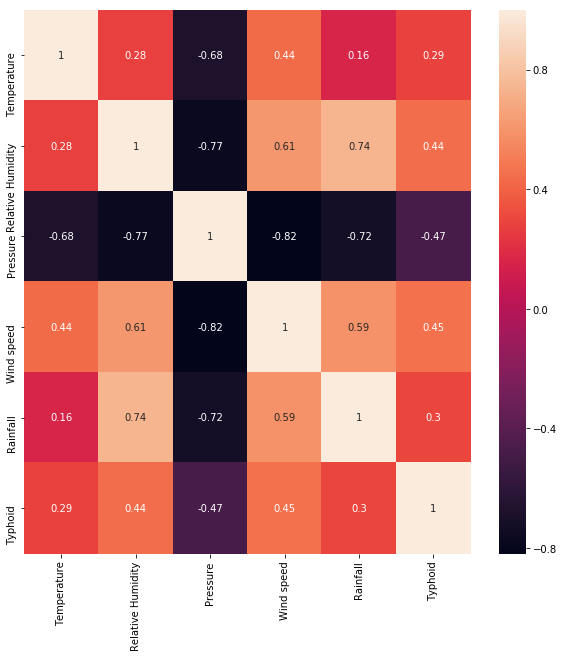

In [14]:
final_full_csv_corr = final_full_csv.corr() 

plt.figure(figsize=(10,10))
sns.heatmap(final_full_csv_corr,annot=True)

In [15]:
temperature_diff = final_full_csv.iloc[:,0].diff()

In [16]:
rainfall_diff = final_full_csv.iloc[:,4].diff()

In [17]:
fig = make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=final_full_csv.index,y=final_full_csv['Temperature'],name='Temeprature'),secondary_y=True)
fig.add_trace(go.Scatter(x=final_full_csv.index,y=final_full_csv['Relative Humidity'],name='Humidity'),secondary_y=True)
fig.add_trace(go.Scatter(x=final_full_csv.index,y=final_full_csv['Pressure'],name='Pressure'),secondary_y=True)
fig.add_trace(go.Scatter(x=final_full_csv.index,y=final_full_csv['Wind speed'],name='Wind Speed'),secondary_y=True)
fig.add_trace(go.Scatter(x=final_full_csv.index,y=final_full_csv['Rainfall'],name='Rainfall'),secondary_y=True)
fig.add_trace(go.Scatter(x=final_full_csv.index,y=final_full_csv['Typhoid'],name='Typhoid'))

In [18]:
final_full_csv.head()

Temperature  Relative Humidity  Pressure  Wind speed  Rainfall  \
# Date                                                                       
2005-01-31        22.00              42.33   1010.49        2.68  0.018332   
2005-02-28        23.91              45.03   1010.21        1.84  0.445155   
2005-03-31        27.41              43.95   1007.88        2.17  0.268238   
2005-04-30        30.30              41.94   1005.76        2.05  2.655244   
2005-05-31        31.73              54.40   1003.11        4.39  3.863693   

            Typhoid  
# Date               
2005-01-31       12  
2005-02-28       23  
2005-03-31       21  
2005-04-30       34  
2005-05-31       31

In [19]:
fig = make_subplots()
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-144:-132,5],name='year-2008'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-132:-120,5],name='year-2009'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-120:-108,5],name='year-2010'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-108:-96,5],name='year-2011'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-96:-84,5],name='year-2012'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-84:-72,5],name='year-2013'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-72:-60,5],name='year-2014'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-60:-48,5],name='year-2015'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-48:-36,5],name='year-2016'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-36:-24,5],name='year-2017'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-24:-12,5],name='year-2018'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-12:,5],name='year-2019'))
fig.update_layout(title_text='Typhoid cases throughout years-Month-wise splitted')

In [20]:
total_change = []

for j in range(12):
    sum = 0
    for i in range(240,300,12):
        sum += diseaseList.iloc[j+i,1]
    total_change.append(sum)

In [21]:
px.bar(y=total_change,x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],title='Total Cases divided by months')

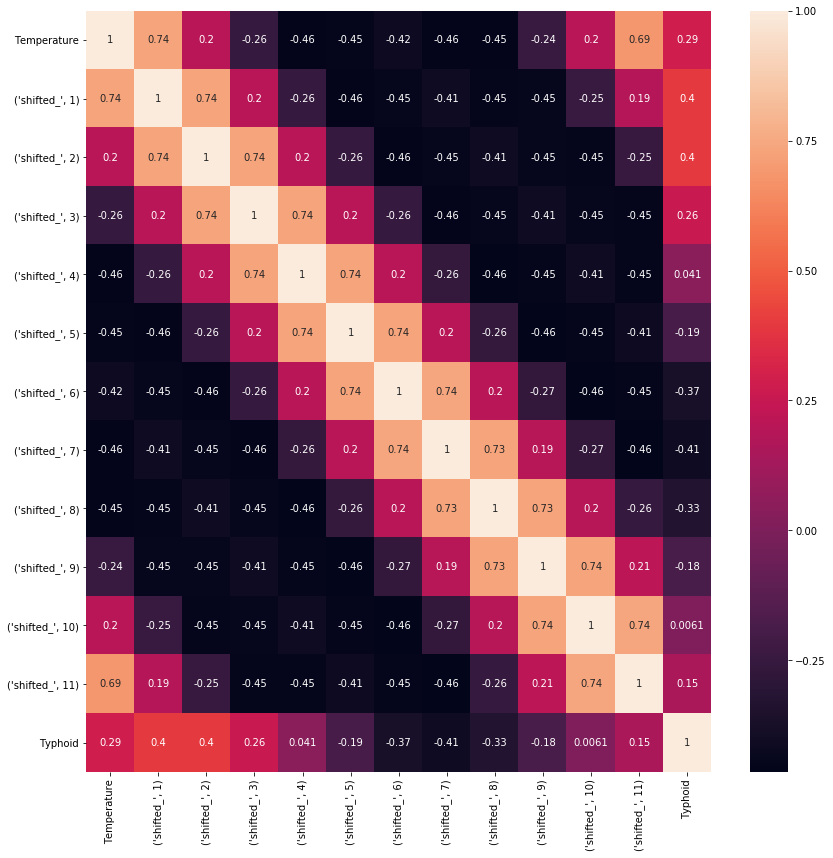

In [22]:
temperature_diff_df = pd.DataFrame(final_full_csv['Temperature'],columns=["Temperature"])

for i in range(1,12):
    temperature_diff_df["shifted_",i] = final_full_csv['Temperature'].shift(i)

temperature_diff_df['Typhoid'] = final_full_csv['Typhoid']

temperature_diff_df_corr = temperature_diff_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(temperature_diff_df_corr,annot=True)

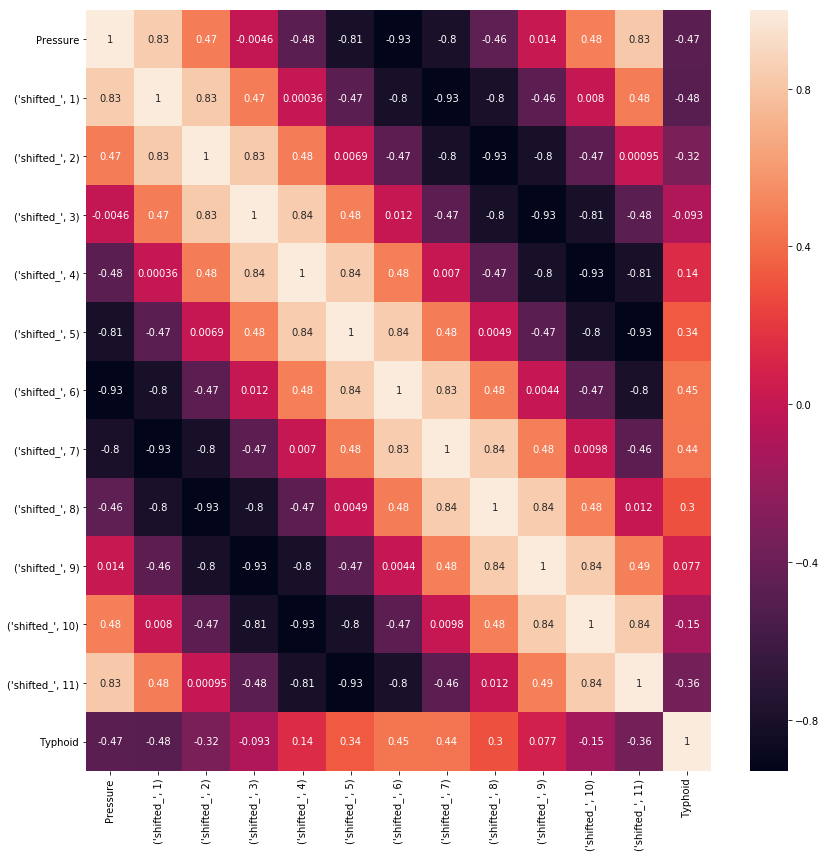

In [23]:
pressure_diff_df = pd.DataFrame(final_full_csv['Pressure'],columns=["Pressure"])

for i in range(1,12):
    pressure_diff_df["shifted_",i] = final_full_csv['Pressure'].shift(i)

pressure_diff_df['Typhoid'] = final_full_csv['Typhoid']

pressure_diff_df_corr = pressure_diff_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(pressure_diff_df_corr,annot=True)

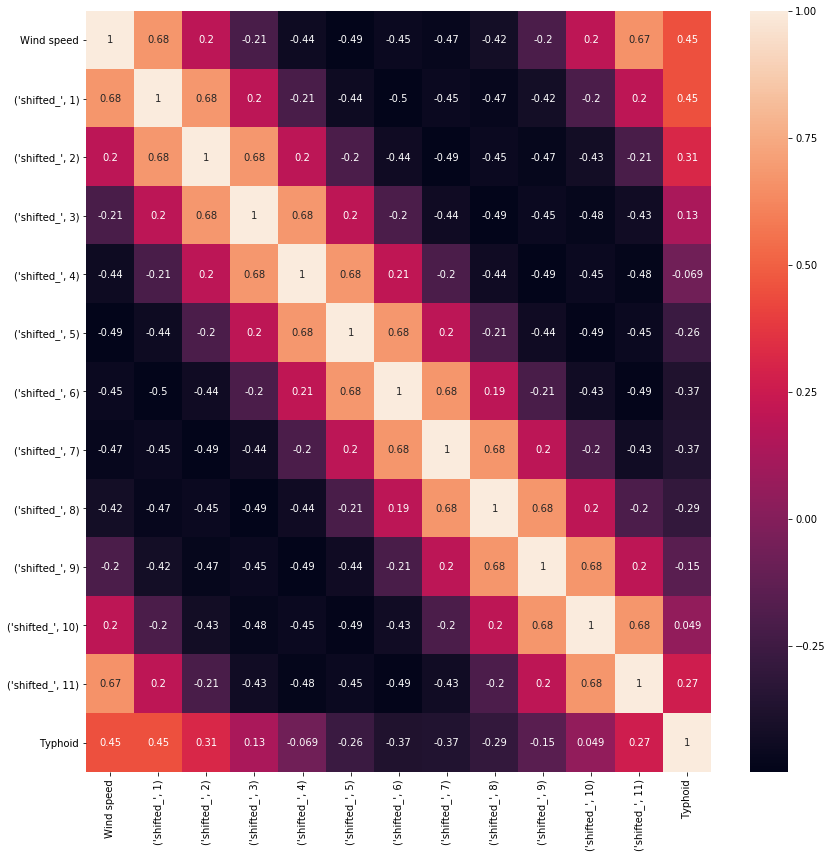

In [24]:
windspeed_diff_df = pd.DataFrame(final_full_csv['Wind speed'],columns=["Wind speed"])

for i in range(1,12):
    windspeed_diff_df["shifted_",i] = final_full_csv['Wind speed'].shift(i)

windspeed_diff_df['Typhoid'] = final_full_csv['Typhoid']

windspeed_diff_df_corr = windspeed_diff_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(windspeed_diff_df_corr,annot=True)

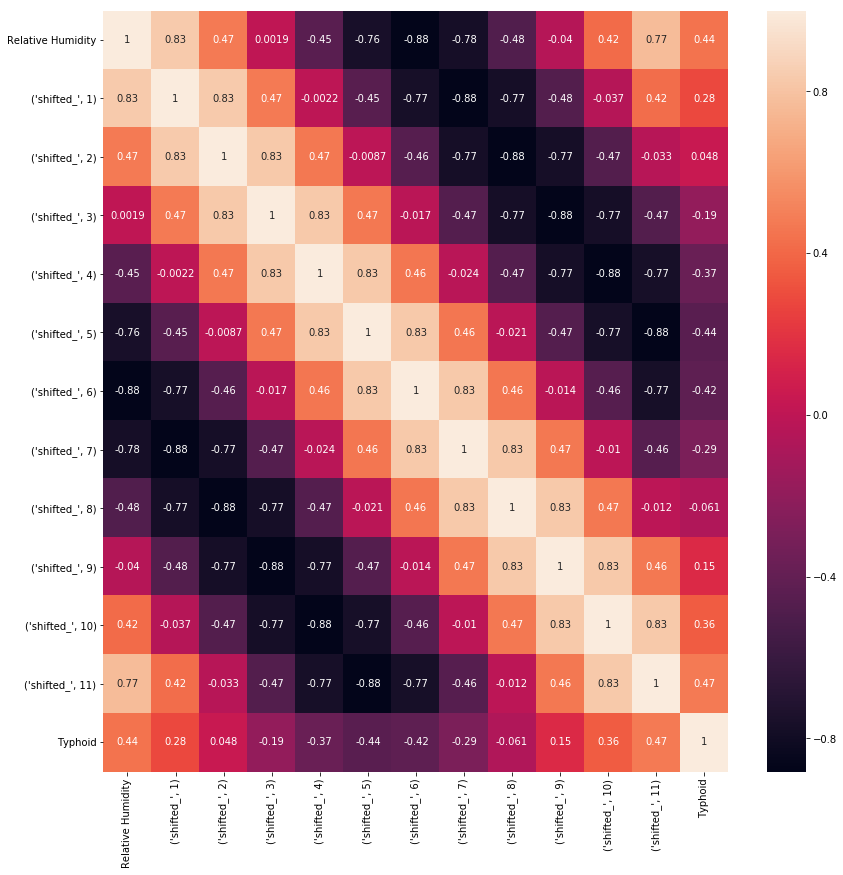

In [25]:
humidity_diff_df = pd.DataFrame(final_full_csv['Relative Humidity'],columns=["Relative Humidity"])

for i in range(1,12):
    humidity_diff_df["shifted_",i] = final_full_csv['Relative Humidity'].shift(i)

humidity_diff_df['Typhoid'] = final_full_csv['Typhoid']

humidity_diff_df_corr = humidity_diff_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(humidity_diff_df_corr,annot=True)

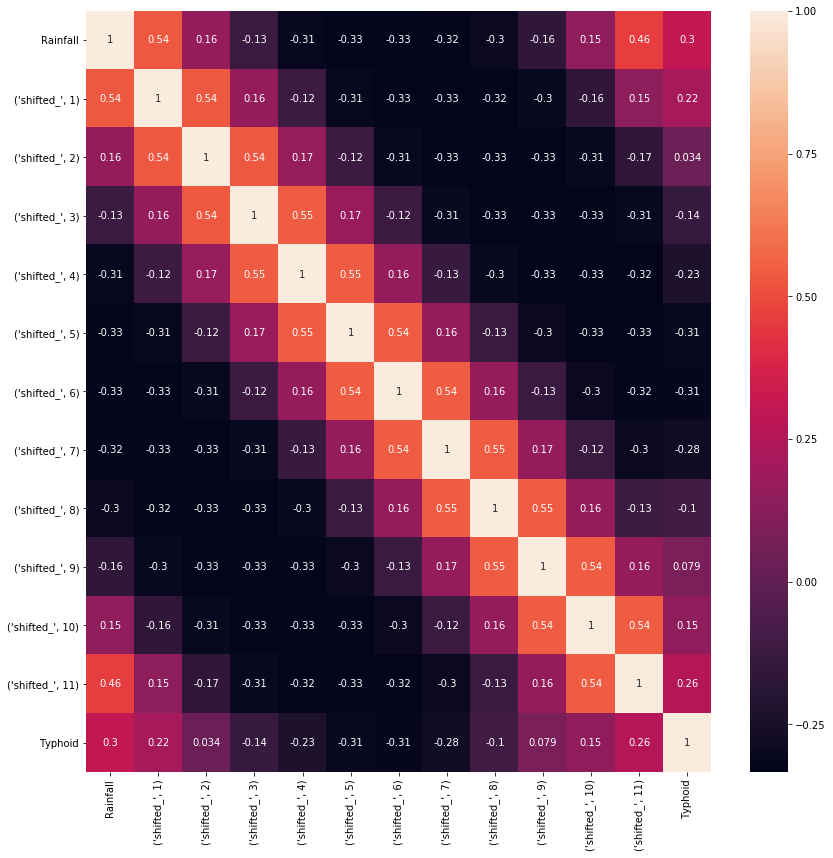

In [26]:
rainfall_diff_df = pd.DataFrame(final_full_csv['Rainfall'],columns=["Rainfall"])

for i in range(1,12):
    rainfall_diff_df["shifted_",i] = final_full_csv['Rainfall'].shift(i)

rainfall_diff_df['Typhoid'] = final_full_csv['Typhoid']

rainfall_diff_df_corr = rainfall_diff_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(rainfall_diff_df_corr,annot=True)

In [27]:
typhoid_cases_shifted = pd.DataFrame(final_full_csv['Typhoid'],columns=['Typhoid'])

In [28]:
for i in range(1,13):
    typhoid_cases_shifted["shifted_",i] = final_full_csv['Typhoid'].shift(i)

In [29]:
typhoid_cases_shifted_corr = typhoid_cases_shifted[12:].corr()

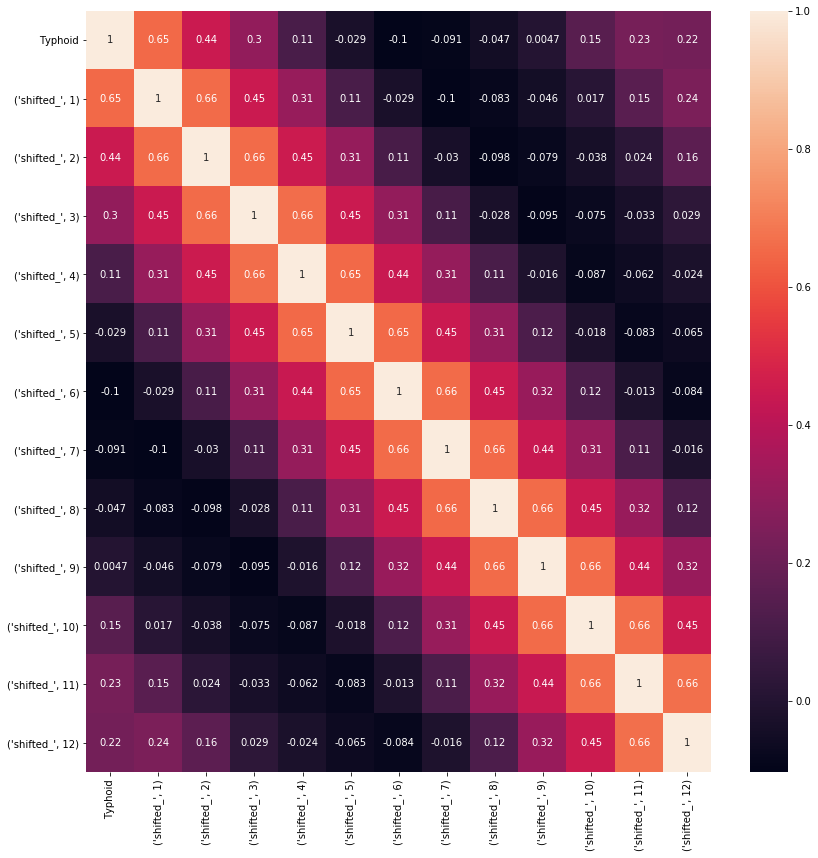

In [30]:
plt.figure(figsize=(14,14))
sns.heatmap(typhoid_cases_shifted_corr,annot=True)

In [31]:
typhoid_df = final_full_csv.copy()

In [32]:
typhoid_df.head()

Temperature  Relative Humidity  Pressure  Wind speed  Rainfall  \
# Date                                                                       
2005-01-31        22.00              42.33   1010.49        2.68  0.018332   
2005-02-28        23.91              45.03   1010.21        1.84  0.445155   
2005-03-31        27.41              43.95   1007.88        2.17  0.268238   
2005-04-30        30.30              41.94   1005.76        2.05  2.655244   
2005-05-31        31.73              54.40   1003.11        4.39  3.863693   

            Typhoid  
# Date               
2005-01-31       12  
2005-02-28       23  
2005-03-31       21  
2005-04-30       34  
2005-05-31       31

In [33]:
typhoid_df['temperature_shifed_1'] = final_full_csv['Temperature'].shift()
typhoid_df['pressure_shifed_1'] = final_full_csv['Pressure'].shift()
typhoid_df['windspeed_shifted_1'] = final_full_csv['Wind speed'].shift()
typhoid_df['typhoid_shifted_1'] = final_full_csv['Typhoid'].shift()

In [34]:
typhoid_df_final = typhoid_df.dropna()

In [35]:
typhoid_df_final_corr = typhoid_df_final.corr()

In [36]:
typhoid_df_final.iloc[70,5]

7

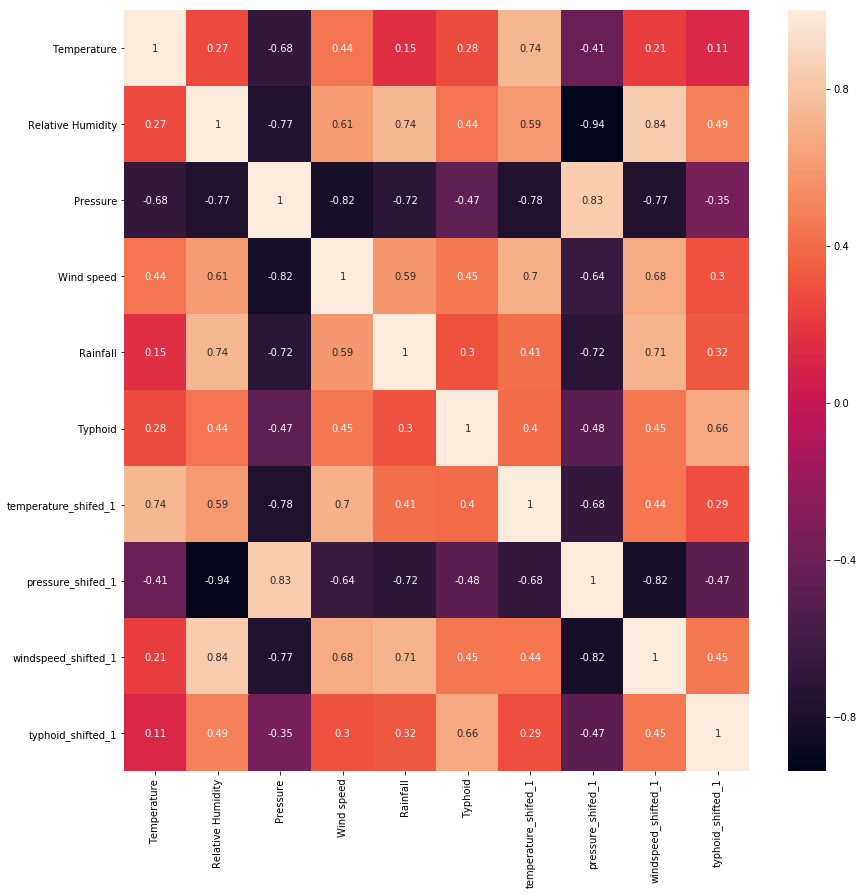

In [37]:
plt.figure(figsize=(14,14))
sns.heatmap(typhoid_df_final_corr,annot=True)

In [38]:
typhoid_df_final['Typhoid'].iplot()

In [39]:
stationarity_or_not_ad_fuller(typhoid_df_final['Typhoid'])

Results of Dickey-Fuller Test:
Test Statistic                  -5.593604
p-value                          0.000001
#Lags Used                       3.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64


In [40]:
boxcox_typhoid,lambda_typhoid = boxcox(x=typhoid_df_final['Typhoid'])

In [41]:
lambda_typhoid

0.382258676318493

In [42]:
px.line(y=boxcox_typhoid)

In [43]:
stationarity_or_not_ad_fuller(boxcox_typhoid)

Results of Dickey-Fuller Test:
Test Statistic                -6.211899e+00
p-value                        5.481958e-08
#Lags Used                     0.000000e+00
Number of Observations Used    1.780000e+02
Critical Value (1%)           -3.467632e+00
Critical Value (5%)           -2.877918e+00
Critical Value (10%)          -2.575501e+00
dtype: float64


In [44]:
boxcox_typhoid_diff = np.empty(len(boxcox_typhoid))

boxcox_typhoid_diff[0] = np.NaN

for i in range(1,len(boxcox_typhoid)):
    boxcox_typhoid_diff[i] = boxcox_typhoid[i] - boxcox_typhoid[i-1]

In [45]:
len(boxcox_typhoid_diff)

179

In [46]:
px.line(y=boxcox_typhoid_diff)

In [47]:
stationarity_or_not_ad_fuller(boxcox_typhoid)

Results of Dickey-Fuller Test:
Test Statistic                -6.211899e+00
p-value                        5.481958e-08
#Lags Used                     0.000000e+00
Number of Observations Used    1.780000e+02
Critical Value (1%)           -3.467632e+00
Critical Value (5%)           -2.877918e+00
Critical Value (10%)          -2.575501e+00
dtype: float64


In [48]:
typhoid_df_final_final = typhoid_df_final.dropna()

In [49]:
typhoid_df_final_final['Typhoid'] = boxcox_typhoid_diff

In [50]:
typhoid_df_final_final = typhoid_df_final_final.dropna()

In [51]:
typhoid_pacf = pacf(boxcox_typhoid_diff[1:],nlags=64)
px.line(y=typhoid_pacf)

In [52]:
typhoid_acf = acf(boxcox_typhoid_diff[1:],nlags=120,fft=False)
px.line(y=typhoid_acf)

In [53]:
auto_arima(diseaseList.iloc[120:,1],start_p=0,start_q=0,start_P=0,start_Q=0,trend='n',m=12,alpha=0.1)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
   scoring='mse', scoring_args=None, seasonal_order=(1, 0, 1, 12),
   start_params=None, suppress_warnings=False, trend='n',
   with_intercept=True)

In [54]:
166/len(boxcox_typhoid_diff)

0.9273743016759777

In [55]:
154/len(boxcox_typhoid_diff[1:])

0.8651685393258427

In [56]:
gastro_data = typhoid_df_final_final['Typhoid']

gastro_size = int(len(gastro_data) * 0.8651685393258427)

gastro_train,gastro_test = gastro_data[:gastro_size],gastro_data[gastro_size:]

gastro_history =  [x for x in gastro_train]
gastro_pred = []

for i in range(len(gastro_test)):
    gastro_model =SARIMAX(gastro_history, trend='c', order=(1,1,1), seasonal_order=(1,1,2,12),enforce_invertibility=False,
                       enforce_stationarity=False)
    gastro_fit = gastro_model.fit(trend='c',solver='lbfgs',disp=1,maxiter=200)
    gastro_output = gastro_fit.forecast()
    gastro_pred.append(gastro_output[0])
    print(gastro_output)
    gastro_history.append(gastro_test[i])
    print("Predicted = {0} :  Expected = {1}".format(gastro_output[0],gastro_test[i]))

[-0.58371101]
Predicted = -0.583711011645917 :  Expected = 0.7424914546479418
[-0.75591632]
Predicted = -0.7559163234258692 :  Expected = -0.7424914546479418
[1.70997161]
Predicted = 1.7099716080358012 :  Expected = 0.38101782981460985
[0.6520599]
Predicted = 0.6520599015315769 :  Expected = -0.38101782981460985
[0.77705776]
Predicted = 0.7770577557702781 :  Expected = 1.2532357937293614
[0.01937102]
Predicted = 0.01937101610413494 :  Expected = -0.16638917894886518
[0.63309658]
Predicted = 0.6330965763850624 :  Expected = 0.7218795326638912
[-0.42107195]
Predicted = -0.42107194920361035 :  Expected = 0.6615661625766354
[-0.78503948]
Predicted = -0.7850394793232982 :  Expected = -1.4680441079781943
[-0.65289451]
Predicted = -0.652894507125344 :  Expected = -2.41860733052832
[0.22151306]
Predicted = 0.2215130554790612 :  Expected = -0.5110465570846197
[-0.36998975]
Predicted = -0.3699897548678347 :  Expected = 1.82875800483386
[-1.22226273]
Predicted = -1.222262729721146 :  Expected = -

In [57]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(gastro_test,gastro_pred) * 100)))

Accuracy is 32%


In [58]:
real_diff_pred = np.empty(len(gastro_pred))
real_diff_test = np.empty(len(gastro_test))

In [59]:
len(gastro_pred)

24

In [60]:
for i in range(len(gastro_pred)):
    real_diff_pred[i] = boxcox_typhoid[-25+i] + gastro_pred[i]
    real_diff_test[i] = boxcox_typhoid[-25+i] + gastro_test[i]

In [61]:
real_diff_test

array([ 9.14312675,  8.4006353 ,  8.78165313,  8.4006353 ,  9.65387109,
        9.48748191, 10.20936144, 10.87092761,  9.4028835 ,  6.98427617,
        6.47322961,  8.30198761,  7.67722663,  5.76066047,  7.78559953,
        5.76066047,  8.20187811,  7.78559953, 10.20936144, 10.43592596,
       10.72846761,  9.14312675,  8.68833763,  7.22406533])

In [62]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(real_diff_test,real_diff_pred) * 100)))

Accuracy is 38%


In [63]:
typhoid_pred_temp= np.empty(len(real_diff_pred))
typhoid_test_temp= np.empty(len(real_diff_test))

In [64]:
def invert_boxcox(value, lam):
    # log case
    if lam == 0:
        return exp(value)
    # all other cases
    return exp(log(lam * value + 1) / lam)

In [65]:
for i in range(len(typhoid_pred_temp)):
    typhoid_pred_temp[i] = invert_boxcox(real_diff_pred[i],lambda_typhoid)
    typhoid_test_temp[i] = invert_boxcox(real_diff_test[i],lambda_typhoid)

In [66]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(typhoid_test_temp,typhoid_pred_temp) * 100)))

Accuracy is 41%


In [67]:
fig = make_subplots()
fig.add_trace(go.Scatter(y=typhoid_test_temp,name='Actual'))
fig.add_trace(go.Scatter(y=typhoid_pred_temp,name='Predicted'))

In [68]:
diseaseList.iloc[-12:,1].iplot()

In [69]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [70]:
1-154/len(typhoid_df_final_final)

0.1348314606741573

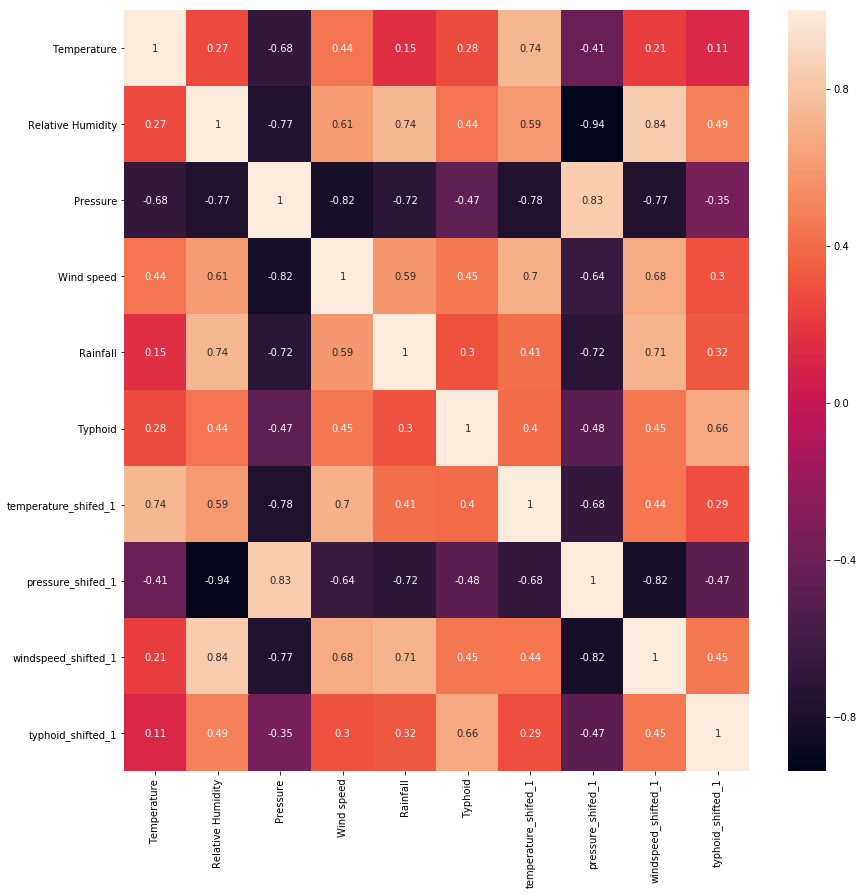

In [71]:
plt.figure(figsize=(14,14))
sns.heatmap(typhoid_df_final_corr,annot=True)

In [72]:
typhoid_df_final_final.columns

Index(['Temperature', 'Relative Humidity', 'Pressure', 'Wind speed',
       'Rainfall', 'Typhoid', 'temperature_shifed_1', 'pressure_shifed_1',
       'windspeed_shifted_1', 'typhoid_shifted_1'],
      dtype='object')

In [73]:
tempcsv = typhoid_df_final_final.copy()
gastro_x = tempcsv.drop(['Temperature','Rainfall', 'Typhoid','windspeed_shifted_1','Relative Humidity',
                         'temperature_shifed_1','Wind speed'],axis=1)
gastro_y= tempcsv['Typhoid']

In [74]:
scaler1 = MinMaxScaler(feature_range=(0,1))
# scaler2 = MinMaxScaler(feature_range=(0,1))

In [75]:
# temp = gastro_y.reshape(-1,1)

In [76]:
scaled_x = scaler1.fit_transform(gastro_x)
# scaled_y = scaler2.fit_transform(temp)

In [77]:
gastro_X_train,gastro_X_test,gastro_y_train,gastro_y_test = train_test_split(scaled_x,gastro_y,test_size=0.13,shuffle=False)

In [78]:
len(gastro_X_test)

24

In [79]:
auto_predict = np.empty(len(gastro_y_test))
auto_history_X = [x for x in gastro_X_train]
auto_history_y = [y for y in gastro_y_train]

for i in range(len(gastro_X_test)):
    auto_model =SARIMAX(auto_history_y,exog=auto_history_X,trend='c', order=(1,1,1), seasonal_order=(1,1,1,12),enforce_invertibility=False,
                       enforce_stationarity=False)
    auto_result = auto_model.fit()
    auto_output = auto_result.forecast(exog=gastro_X_test[i])
    auto_predict[i] = auto_output[0]
    auto_history_y.append(gastro_y_test[i])
    auto_history_X.append(gastro_X_test[i])
    print('predicted={0}/texpected={1}'.format(auto_output[0],gastro_y_test[i]))

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-0.9977223347581294/texpected=0.7424914546479418


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-0.5492010432876766/texpected=-0.7424914546479418


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=1.3003091700892524/texpected=0.38101782981460985


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.2244002751160501/texpected=-0.38101782981460985


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.9950154225403951/texpected=1.2532357937293614


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.16814778442128198/texpected=-0.16638917894886518


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.7288139334426802/texpected=0.7218795326638912


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-0.04256008572444259/texpected=0.6615661625766354


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-1.3193150447207609/texpected=-1.4680441079781943


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-0.9312138394643714/texpected=-2.41860733052832


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.31020150397094337/texpected=-0.5110465570846197


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.23595958089511626/texpected=1.82875800483386


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-0.36105631551967043/texpected=-0.6247609889889549


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-0.6690013732212376/texpected=-1.916566151801213


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=1.5289110593065276/texpected=2.0249390562353886


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.45910777660381985/texpected=-2.0249390562353886


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=1.5648137173634635/texpected=2.441217632641848


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.47701935779131244/texpected=-0.4162785764064596


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.927531653394079/texpected=2.4237619127354177


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-0.5804307311387564/texpected=0.22656451640751918


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-1.165630131136889/texpected=0.2925416542502024


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-1.8314458076694953/texpected=-1.5853408634541672


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-0.5732255330830212/texpected=-0.4547891209778161
predicted=-0.48899210901498336/texpected=-1.4642723001179583


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [80]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(gastro_y_test,auto_predict) * 100)))

Accuracy is 42%


In [81]:
real_diff_pred_2 = np.empty(len(auto_predict))
real_diff_test_2 = np.empty(len(gastro_y_test))

In [82]:
len(real_diff_pred_2)

24

In [83]:
for i in range(len(auto_predict)):
    real_diff_pred_2[i] = boxcox_typhoid[-25+i] + auto_predict[i]
    real_diff_test_2[i] = boxcox_typhoid[-25+i] + gastro_y_test[i]

In [84]:
typhoid_pred_temp_2= np.empty(len(real_diff_pred_2))
typhoid_test_temp_2= np.empty(len(real_diff_test_2))

In [85]:
for i in range(len(typhoid_pred_temp_2)):
    typhoid_pred_temp_2[i] = invert_boxcox(real_diff_pred_2[i],lambda_typhoid)
    typhoid_test_temp_2[i] = invert_boxcox(real_diff_test_2[i],lambda_typhoid)

In [86]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(typhoid_test_temp_2,typhoid_pred_temp_2) * 100)))

Accuracy is 51%


In [87]:
mean_absolute_percentage_error(typhoid_test_temp_2,typhoid_pred_temp_2)

21.658451504327118

In [88]:
fig = make_subplots()
fig.add_trace(go.Scatter(y=typhoid_test_temp_2,name='Actual'))
fig.add_trace(go.Scatter(y=typhoid_pred_temp_2,name='Predicted'))

In [89]:
# import tensorflow as tf
# from sklearn.preprocessing import StandardScaler,MinMaxScaler

# typhoid_df_final.columns

# typhoid_df_final.head()

# gastro_df_lstm = typhoid_df_final.copy()

# gastro_df_lstm.head()

# tf.random.set_seed(12)

# X = gastro_df_lstm.copy()
# data_training = X.iloc[:167,:]
# data_test = X.iloc[167:,:]

# scaler = MinMaxScaler(feature_range=(0,1))

# X.head()

# traindata = scaler.fit_transform(data_training)

# multiXtrain = []
# multiytrain = []

# for i in range(24,traindata.shape[0]):
#     multiXtrain.append(traindata[i-24:i])
#     multiytrain.append(traindata[i,5])

# multiXtrain,multiytrain = np.array(multiXtrain),np.array(multiytrain)

# multiXtrain.shape,multiytrain.shape

# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, LSTM, Dropout,TimeDistributed

# regressior = Sequential()
# regressior.add(LSTM(units = 32, activation = 'relu', return_sequences = True, input_shape = (multiXtrain.shape[1], 10)))
# regressior.add(Dropout(0.3))

# regressior.add(LSTM(units = 64, activation = 'relu', return_sequences = True))
# regressior.add(Dropout(0.4))

# regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
# regressior.add(Dropout(0.5)) 

# regressior.add(LSTM(units = 96, activation = 'relu', return_sequences = True))
# regressior.add(Dropout(0.5))

# regressior.add(LSTM(units = 120, activation = 'relu'))
# regressior.add(Dropout(0.5))

# regressior.add(Dense(units=1))

# regressior.summary()

# regressior.compile(optimizer='adam',loss='mean_squared_error')

# regressior.fit(multiXtrain,multiytrain,batch_size=32,epochs=200)

# data_test.head()

# past_12_months = data_training.tail(12)

# df = past_12_months.append(data_test,ignore_index=True)

# df.head()

# df1 = scaler.fit_transform(df)

# multiXtest = []
# multiytest = []

# for i in range(12,len(df1)):
#     multiXtest.append(df1[i-12:i])
#     multiytest.append(df1[i,5])

# multiXtest , multiytest = np.array(multiXtest),np.array(multiytest)

# multiXtest.shape,multiytest.shape

# multiypred = regressior.predict(multiXtest,batch_size=32)

# multiypred.shape

# plt.figure(figsize=(14,5))
# plt.plot(multiytest, label = 'real number of cases')
# plt.plot(multiypred, label = 'predicted number of cases')
# plt.ylabel('# passengers')
# plt.legend()
# plt.show()

# print("Accuracy is : {0}% ".format(math.ceil(r2_score(multiytest,multiypred)*100)))

In [90]:
typhoid_df_final.head()

Temperature  Relative Humidity  Pressure  Wind speed    Rainfall  \
# Date                                                                         
2005-02-28        23.91              45.03   1010.21        1.84    0.445155   
2005-03-31        27.41              43.95   1007.88        2.17    0.268238   
2005-04-30        30.30              41.94   1005.76        2.05    2.655244   
2005-05-31        31.73              54.40   1003.11        4.39    3.863693   
2005-06-30        30.82              67.30    998.15        5.57  342.739008   

            Typhoid  temperature_shifed_1  pressure_shifed_1  \
# Date                                                         
2005-02-28       23                 22.00            1010.49   
2005-03-31       21                 23.91            1010.21   
2005-04-30       34                 27.41            1007.88   
2005-05-31       31                 30.30            1005.76   
2005-06-30       48                 31.73            1003.11   

            windspeed_shifted_1  typhoid_shifted_1  
# Date                                              
2005-02-28                 2.68               12.0  
2005-03-31                 1.84               23.0  
2005-04-30                 2.17               21.0  
2005-05-31                 2.05               34.0  
2005-06-30                 4.39               31.0

In [91]:
typhoid_df_final_final.columns

Index(['Temperature', 'Relative Humidity', 'Pressure', 'Wind speed',
       'Rainfall', 'Typhoid', 'temperature_shifed_1', 'pressure_shifed_1',
       'windspeed_shifted_1', 'typhoid_shifted_1'],
      dtype='object')

In [92]:
dataset = pd.DataFrame()
daterange = pd.date_range('2005-02-28',freq='M',periods=179)
dataset['ds'] = daterange
dataset['y'] = typhoid_df_final['Typhoid'].values
dataset['Temperature'] = typhoid_df_final['Temperature'].values
dataset['Relative_Humidity'] = typhoid_df_final['Relative Humidity'].values
dataset['Pressure'] = typhoid_df_final['Pressure'].values
dataset['Wind_speed'] = typhoid_df_final['Wind speed'].values
dataset['Rainfall'] = typhoid_df_final['Rainfall'].values
dataset['temperature_shifted_1'] = typhoid_df_final['temperature_shifed_1'].values
dataset['windspeed_shifted_1'] = typhoid_df_final['windspeed_shifted_1'].values
dataset['pressure_shifted_1'] = typhoid_df_final['pressure_shifed_1'].values
dataset['typhoid_shifted_1'] = typhoid_df_final['typhoid_shifted_1'].values

In [93]:
dataset.head()

ds   y  Temperature  Relative_Humidity  Pressure  Wind_speed  \
0 2005-02-28  23        23.91              45.03   1010.21        1.84   
1 2005-03-31  21        27.41              43.95   1007.88        2.17   
2 2005-04-30  34        30.30              41.94   1005.76        2.05   
3 2005-05-31  31        31.73              54.40   1003.11        4.39   
4 2005-06-30  48        30.82              67.30    998.15        5.57   

     Rainfall  temperature_shifted_1  windspeed_shifted_1  pressure_shifted_1  \
0    0.445155                  22.00                 2.68             1010.49   
1    0.268238                  23.91                 1.84             1010.21   
2    2.655244                  27.41                 2.17             1007.88   
3    3.863693                  30.30                 2.05             1005.76   
4  342.739008                  31.73                 4.39             1003.11   

   typhoid_shifted_1  
0               12.0  
1               23.0  
2               21.0  
3               34.0  
4               31.0

In [94]:
train_dataset = dataset.iloc[:166,:]
test_dataset = dataset.iloc[166:,:]

In [95]:
def is_gastroentrisis_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 4 and date.month < 10)

In [96]:
train_dataset['on_season'] = dataset['ds'].apply(is_gastroentrisis_season)
train_dataset['off_season'] = ~dataset['ds'].apply(is_gastroentrisis_season)

In [97]:
train_dataset.columns

Index(['ds', 'y', 'Temperature', 'Relative_Humidity', 'Pressure', 'Wind_speed',
       'Rainfall', 'temperature_shifted_1', 'windspeed_shifted_1',
       'pressure_shifted_1', 'typhoid_shifted_1', 'on_season', 'off_season'],
      dtype='object')

In [98]:
pro_regressor = Prophet(yearly_seasonality=False,growth='linear',seasonality_mode='additive',
                       seasonality_prior_scale=25)
pro_regressor.add_seasonality(name='yearly_on_season', period=365, fourier_order=15, condition_name='on_season')
pro_regressor.add_seasonality(name='yearly_off_season', period=365, fourier_order=15, condition_name='off_season')
# pro_regressor.add_regressor('Temperature')
# pro_regressor.add_regressor('Relative_Humidity')
pro_regressor.add_regressor('Pressure')
# pro_regressor.add_regressor('Wind_speed')
# pro_regressor.add_regressor('Rainfall')
pro_regressor.add_regressor('temperature_shifted_1')
pro_regressor.add_regressor('windspeed_shifted_1')
pro_regressor.add_regressor('pressure_shifted_1')
pro_regressor.add_regressor('typhoid_shifted_1')

In [99]:
pro_regressor.fit(train_dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [100]:
test_dataset['on_season'] = dataset['ds'].apply(is_gastroentrisis_season)
test_dataset['off_season'] = ~dataset['ds'].apply(is_gastroentrisis_season)

In [101]:
forecast_data = pro_regressor.predict(test_dataset)

In [102]:
forecast_data

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2018-12-31  35.208148   11.494441   42.189556    35.208148    35.208148   
1  2019-01-31  35.230895   20.209371   51.659515    35.230895    35.230895   
2  2019-02-28  35.251441   19.863374   51.079646    35.251441    35.251441   
3  2019-03-31  35.274188   20.118059   51.764002    35.274188    35.274188   
4  2019-04-30  35.296201   30.596251   62.245863    35.296201    35.296201   
5  2019-05-31  35.318948   24.947298   57.597903    35.318948    35.318948   
6  2019-06-30  35.340961   32.047765   63.474849    35.340961    35.340961   
7  2019-07-31  35.363708   46.780097   79.685308    35.363708    35.363708   
8  2019-08-31  35.386455   49.911624   80.238762    35.386455    35.386455   
9  2019-09-30  35.408468   37.218516   69.424479    35.408468    35.408469   
10 2019-10-31  35.431215   43.852563   75.530687    35.431215    35.431216   
11 2019-11-30  35.453229   31.890793   63.833919    35.453229    35.453229   
12 2019-12-31  35.475976   25.433128   55.491734    35.475976    35.475976   

     Pressure  Pressure_lower  Pressure_upper  additive_terms  ...  \
0   11.471281       11.471281       11.471281       -8.317151  ...   
1   13.646389       13.646389       13.646389        1.337346  ...   
2   10.514983       10.514983       10.514983        0.012368  ...   
3    6.052260        6.052260        6.052260        1.366074  ...   
4   -0.154300       -0.154300       -0.154300       11.082483  ...   
5   -2.123148       -2.123148       -2.123148        6.276963  ...   
6   -9.698526       -9.698526       -9.698526       11.421033  ...   
7  -11.404862      -11.404862      -11.404862       27.672195  ...   
8   -9.398511       -9.398511       -9.398511       30.013093  ...   
9   -5.085796       -5.085796       -5.085796       17.039737  ...   
10   4.233419        4.233419        4.233419       24.436694  ...   
11   7.402327        7.402327        7.402327       12.637699  ...   
12  10.533734       10.533734       10.533734        5.413335  ...   

    yearly_off_season  yearly_off_season_lower  yearly_off_season_upper  \
0            5.778652                 5.778652                 5.778652   
1            4.062481                 4.062481                 4.062481   
2           11.462775                11.462775                11.462775   
3           23.636607                23.636607                23.636607   
4           26.491326                26.491326                26.491326   
5            0.000000                 0.000000                 0.000000   
6            0.000000                 0.000000                 0.000000   
7            0.000000                 0.000000                 0.000000   
8            0.000000                 0.000000                 0.000000   
9            0.000000                 0.000000                 0.000000   
10          -2.081738                -2.081738                -2.081738   
11           9.108008                 9.108008                 9.108008   
12           5.778652                 5.778652                 5.778652   

    yearly_on_season  yearly_on_season_lower  yearly_on_season_upper  \
0           0.000000                0.000000                0.000000   
1           0.000000                0.000000                0.000000   
2           0.000000                0.000000                0.000000   
3           0.000000                0.000000                0.000000   
4           0.000000                0.000000                0.000000   
5          26.616914               26.616914               26.616914   
6          23.234451               23.234451               23.234451   
7          30.135327               30.135327               30.135327   
8           9.767685                9.767685                9.767685   
9          -6.946086               -6.946086               -6.946086   
10          0.000000                0.000000                0.000000   
11          0.000000  

In [103]:
test_dataset['y']

166    42
167    36
168    21
169    37
170    21
171    41
172    37
173    64
174    67
175    71
176    51
177    46
178    32
Name: y, dtype: int64

In [104]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(test_dataset['y'],forecast_data['yhat']) * 100)))

Accuracy is 46%


In [105]:
fig = make_subplots()
fig.add_trace(go.Scatter(y=test_dataset['y'],name='Actual'))
fig.add_trace(go.Scatter(y=forecast_data['yhat'],name='Predicted'))

In [106]:
# real_diff_pred_2 = np.empty(len(test_dataset['y']))
# real_diff_test_2 = np.empty(len(forecast_data['yhat']))

# len(test_dataset)

# for i in range(len(test_dataset)):
#     real_diff_pred_2[i] = boxcox_typhoid[-25+i] + forecast_data.iloc[i,-1]
#     real_diff_test_2[i] = boxcox_typhoid[-25+i] + test_dataset.iloc[i,1]

# gastro_pred_temp_2 = np.empty(len(real_diff_pred_2))
# gastro_test_temp_2 = np.empty(len(real_diff_test_2))

# for i in range(len(test_dataset)):
#     gastro_pred_temp_2[i] = invert_boxcox(real_diff_pred_2[i],lambda_typhoid)
#     gastro_test_temp_2[i] = invert_boxcox(real_diff_test_2[i],lambda_typhoid)

# fig = make_subplots()
# fig.add_trace(go.Scatter(y=gastro_test_temp_2,name='Actual'))
# fig.add_trace(go.Scatter(y=gastro_pred_temp_2,name='Predicted'))

# print('Accuracy is {0}%'.format(math.ceil(r2_score(gastro_test_temp_2,gastro_pred_temp_2) * 100)))

# mean_absolute_percentage_error(gastro_test_temp_2,gastro_pred_temp_2)

In [107]:
finalcsv = pd.read_csv('FinalMalaria.csv',index_col='DATE(IST)')

finalcsv['Typhoid'] = diseaseList.iloc[-120:,1].values

In [108]:
typhoid_df_final.iloc[-12:,4]

# Date
2019-01-31      0.031274
2019-02-28      0.093153
2019-03-31      0.199824
2019-04-30      0.876311
2019-05-31      1.347732
2019-06-30    261.955620
2019-07-31    304.591284
2019-08-31    265.514616
2019-09-30    561.887640
2019-10-31     67.191984
2019-11-30     21.497476
2019-12-31      3.526154
Name: Rainfall, dtype: float64

In [109]:
finalcsv.iloc[-18,6] = 550
finalcsv.iloc[-6,6] = 471
finalcsv.iloc[-5,6] = 753

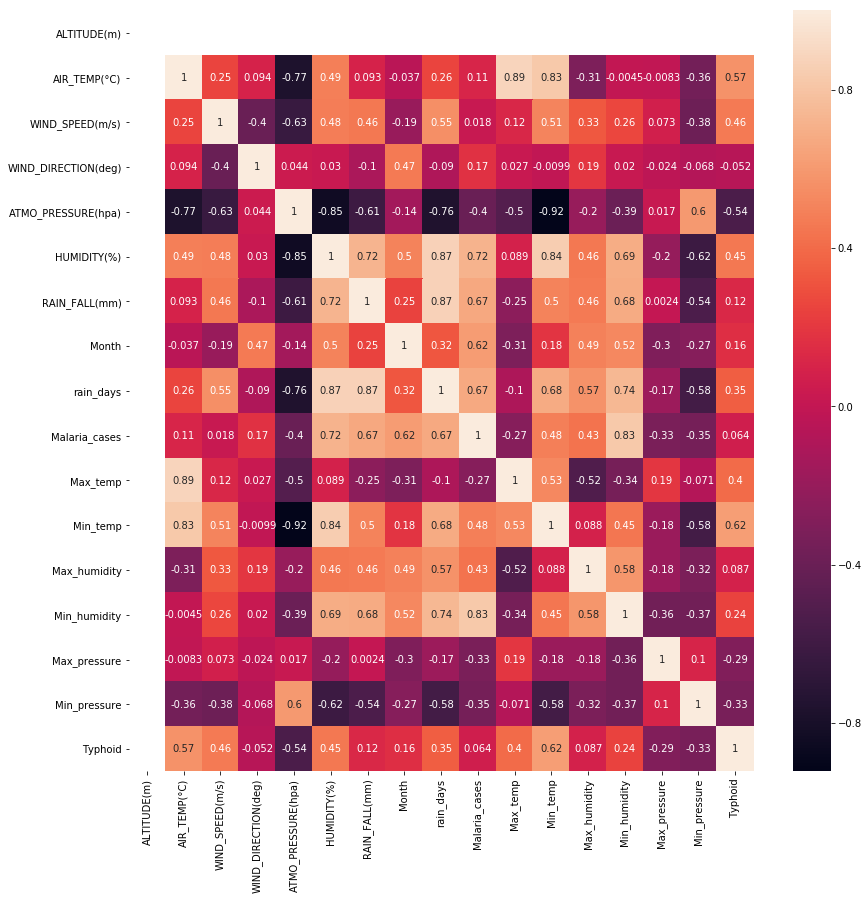

In [110]:
finalcsv_corr = finalcsv[:24].corr()

plt.figure(figsize=(14,14))
sns.heatmap(finalcsv_corr,annot=True)

In [111]:
fig = make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['AIR_TEMP(°C)'],name='AIR_TEMP(°C)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['HUMIDITY(%)'],name='HUMIDITY(%)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['ATMO_PRESSURE(hpa)'],name='ATMO_PRESSURE(hpa)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['WIND_SPEED(m/s)'],name='WIND_SPEED(m/s)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['RAIN_FALL(mm)'],name='RAIN_FALL(mm)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['Typhoid'],name='Typhoid'))

In [112]:
fig = make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=finalcsv.iloc[12:24].index,y=finalcsv.iloc[12:24,1],name='AIR_TEMP(°C)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.iloc[12:24].index,y=finalcsv.iloc[12:24,2],name='WIND_SPEED(m/s)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.iloc[12:24].index,y=finalcsv.iloc[12:24,4],name='ATMO_PRESSURE(hpa)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.iloc[12:24].index,y=finalcsv.iloc[12:24,5],name='HUMIDITY(%)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.iloc[12:24].index,y=finalcsv.iloc[12:24,6],name='RAIN_FALL(mm)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.iloc[12:24].index,y=finalcsv.iloc[12:24,8],name='rain_days'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.iloc[12:24].index,y=finalcsv.iloc[12:24,10],name='Max_temp'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.iloc[12:24].index,y=finalcsv.iloc[12:24,11],name='Min_temp'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.iloc[12:24].index,y=finalcsv.iloc[12:24,12],name='Max_humidity'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.iloc[12:24].index,y=finalcsv.iloc[12:24,13],name='Min_humidity'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.iloc[12:24].index,y=finalcsv.iloc[12:24,14],name='Max_pressure'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.iloc[12:24].index,y=finalcsv.iloc[12:24,15],name='Min_pressure'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.iloc[12:24].index,y=finalcsv.iloc[12:24,16],name='Typhoid'))

In [113]:
fig = make_subplots()
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-144:-132,5],name='year-2008'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-132:-120,5],name='year-2009'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-120:-108,5],name='year-2010'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-108:-96,5],name='year-2011'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-96:-84,5],name='year-2012'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-84:-72,5],name='year-2013'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-72:-60,5],name='year-2014'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-60:-48,5],name='year-2015'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-48:-36,5],name='year-2016'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-36:-24,5],name='year-2017'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-24:-12,5],name='year-2018'))
fig.add_trace(go.Scatter(y=final_full_csv.iloc[-12:,5],name='year-2019'))
fig.update_layout(title_text='Typhoid cases throughout years-Month-wise splitted')

In [114]:
finalcsv.columns

Index(['ALTITUDE(m)', 'AIR_TEMP(°C)', 'WIND_SPEED(m/s)', 'WIND_DIRECTION(deg)',
       'ATMO_PRESSURE(hpa)', 'HUMIDITY(%)', 'RAIN_FALL(mm)', 'Month',
       'rain_days', 'Malaria_cases', 'Max_temp', 'Min_temp', 'Max_humidity',
       'Min_humidity', 'Max_pressure', 'Min_pressure', 'Typhoid'],
      dtype='object')

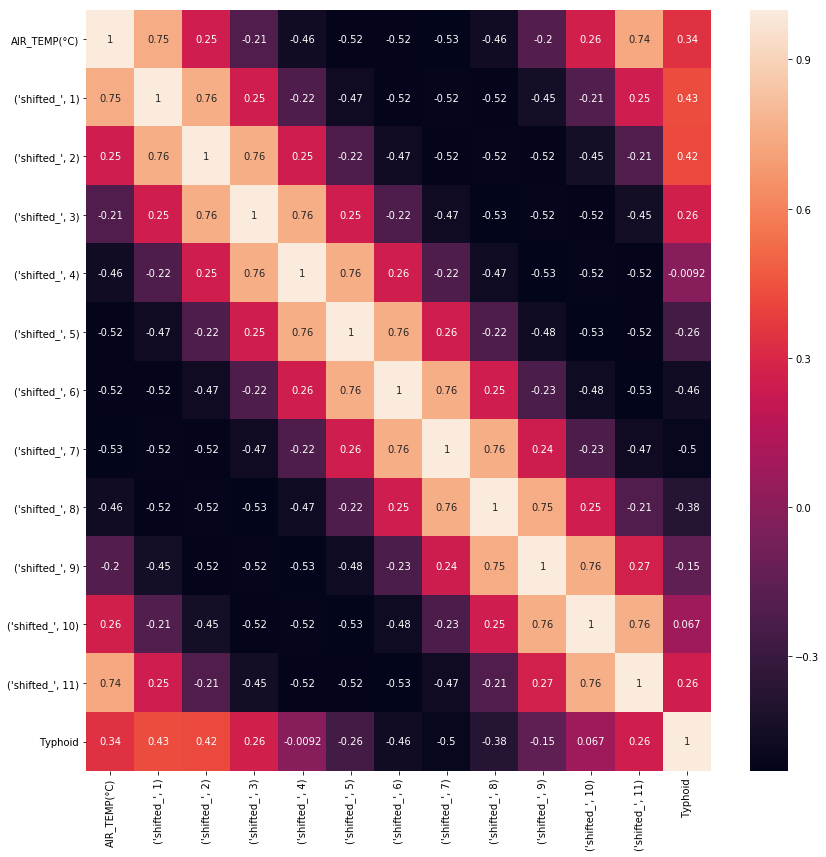

In [115]:
temperature_diff_df = pd.DataFrame(finalcsv['AIR_TEMP(°C)'],columns=["AIR_TEMP(°C)"])

for i in range(1,12):
    temperature_diff_df["shifted_",i] = finalcsv['AIR_TEMP(°C)'].shift(i)

temperature_diff_df['Typhoid'] = finalcsv['Typhoid']

temperature_diff_df_corr = temperature_diff_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(temperature_diff_df_corr,annot=True)

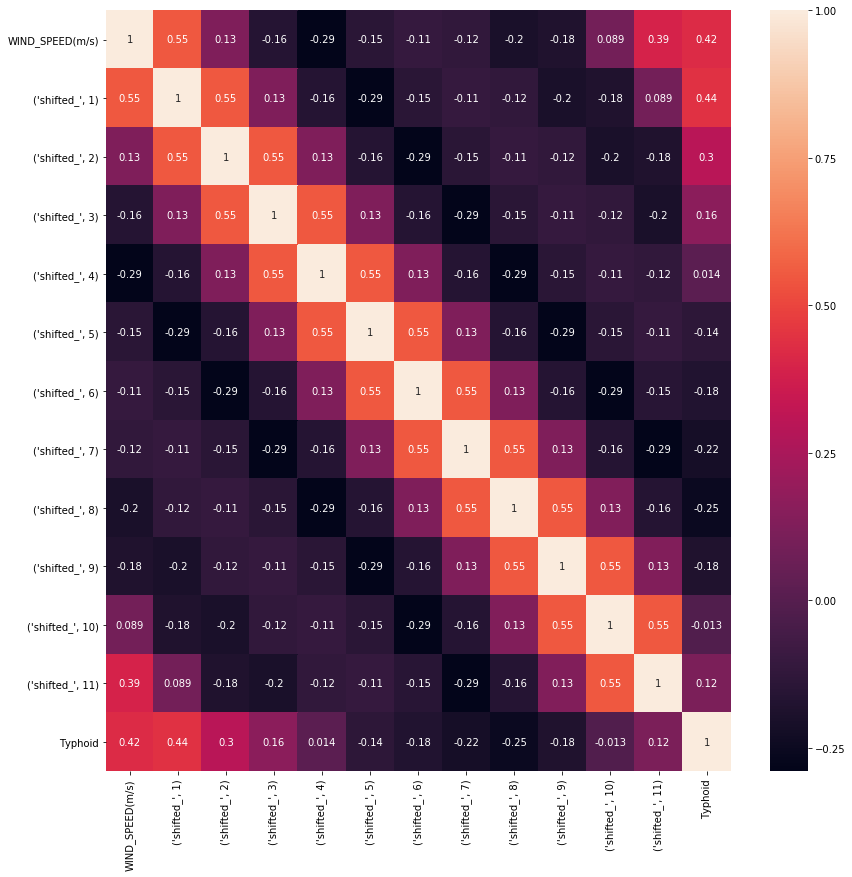

In [116]:
windspeed_diff_df = pd.DataFrame(finalcsv['WIND_SPEED(m/s)'],columns=["WIND_SPEED(m/s)"])

for i in range(1,12):
    windspeed_diff_df["shifted_",i] = finalcsv['WIND_SPEED(m/s)'].shift(i)

windspeed_diff_df['Typhoid'] = finalcsv['Typhoid']

windspeed_diff_df_corr = windspeed_diff_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(windspeed_diff_df_corr,annot=True)

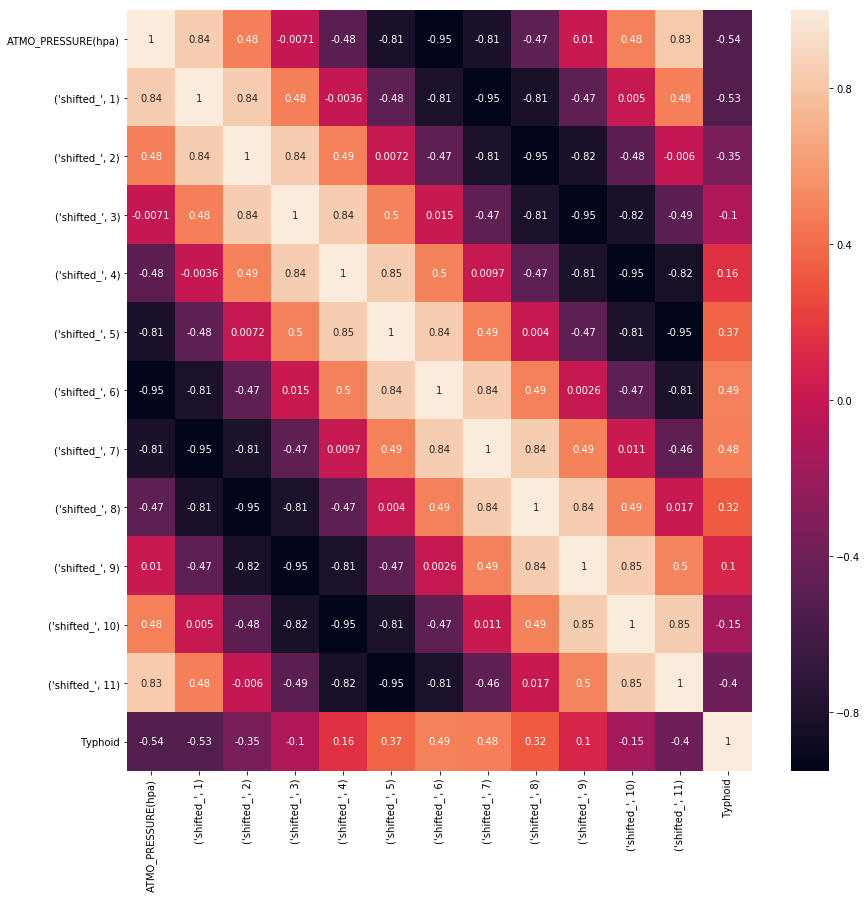

In [117]:
pressure_diff_df = pd.DataFrame(finalcsv['ATMO_PRESSURE(hpa)'],columns=["ATMO_PRESSURE(hpa)"])

for i in range(1,12):
    pressure_diff_df["shifted_",i] = finalcsv['ATMO_PRESSURE(hpa)'].shift(i)

pressure_diff_df['Typhoid'] = finalcsv['Typhoid']

pressure_diff_df_corr = pressure_diff_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(pressure_diff_df_corr,annot=True)

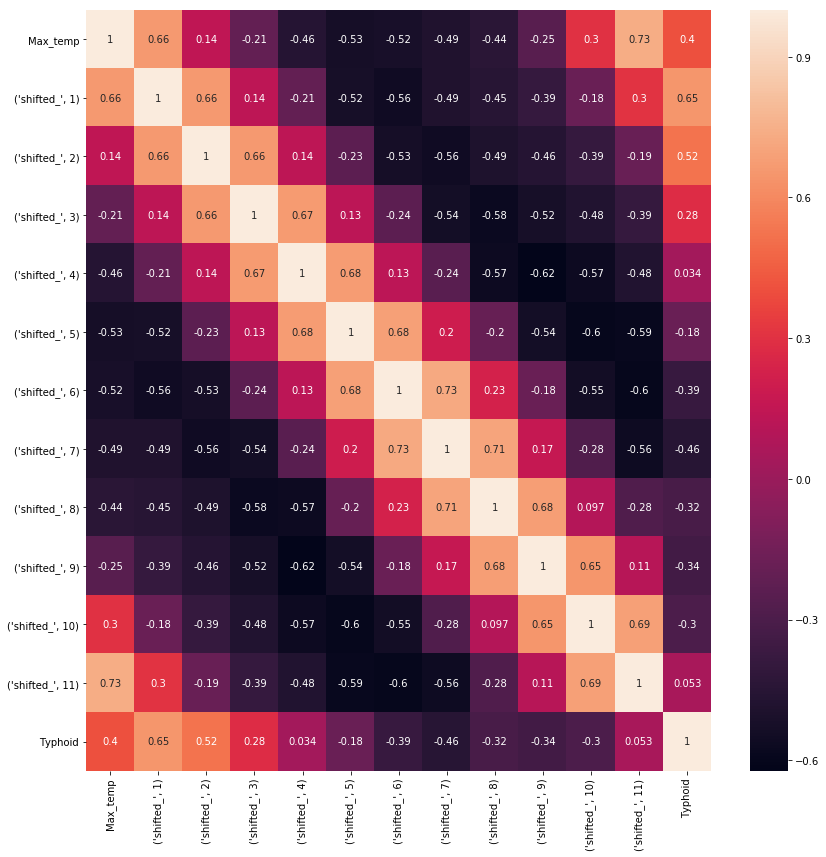

In [118]:
mintemp_diff_df = pd.DataFrame(finalcsv['Max_temp'],columns=["Max_temp"])

for i in range(1,12):
    mintemp_diff_df["shifted_",i] = finalcsv['Max_temp'].shift(i)

mintemp_diff_df['Typhoid'] = finalcsv['Typhoid']

mintemp_diff_df_corr = mintemp_diff_df[:24].corr()

plt.figure(figsize=(14,14))
sns.heatmap(mintemp_diff_df_corr,annot=True)

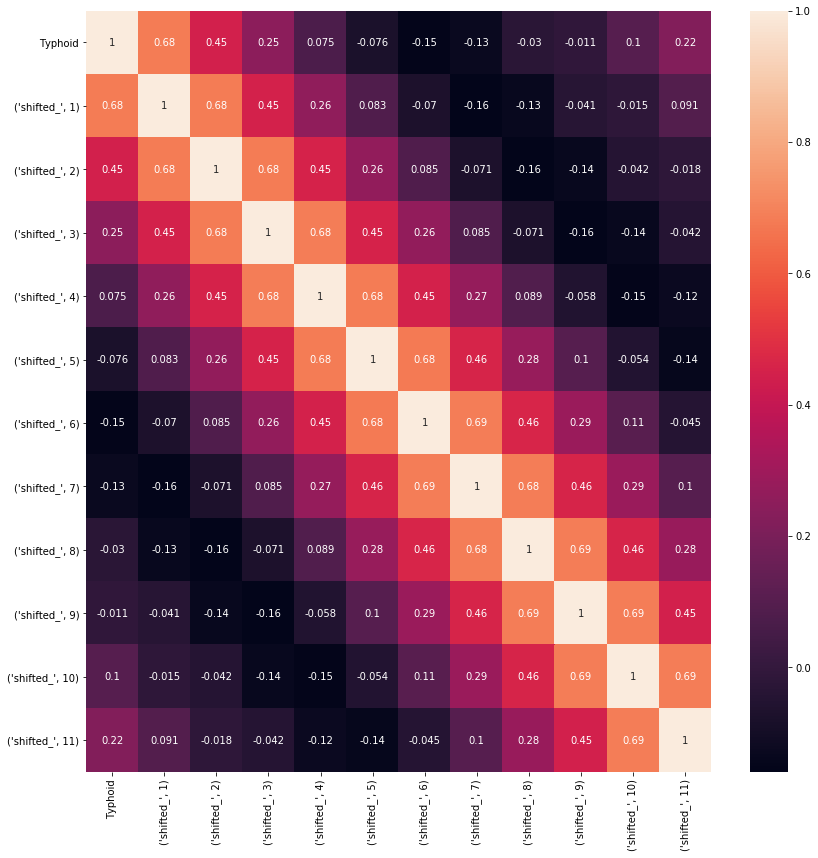

In [119]:
typhoid_diff_df = pd.DataFrame(finalcsv['Typhoid'],columns=["Typhoid"])

for i in range(1,12):
    typhoid_diff_df["shifted_",i] = finalcsv['Typhoid'].shift(i)

typhoid_diff_df_corr = typhoid_diff_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(typhoid_diff_df_corr,annot=True)

In [120]:
finalcsv_temp = finalcsv.copy()

In [121]:
finalcsv_temp.tail()

ALTITUDE(m)  AIR_TEMP(°C)  WIND_SPEED(m/s)  WIND_DIRECTION(deg)  \
DATE(IST)                                                                     
31-08-2019           11            28         1.276539                359.2   
30-09-2019           11            28         1.276539                359.2   
31-10-2019           11            28         1.276539                359.2   
30-11-2019           11            26         1.276539                359.2   
31-12-2019           11            20         1.276539                359.2   

            ATMO_PRESSURE(hpa)  HUMIDITY(%)  RAIN_FALL(mm)  Month  rain_days  \
DATE(IST)                                                                      
31-08-2019              1002.0         85.0     753.000000      8         31   
30-09-2019              1006.0         89.0     423.300000      9         30   
31-10-2019              1011.0         68.0     124.451613     10          2   
30-11-2019              1013.0         67.0       5.000000     11          1   
31-12-2019              1012.6         66.0       1.000000     12          0   

            Malaria_cases  Max_temp  Min_temp  Max_humidity  Min_humidity  \
DATE(IST)                                                                   
31-08-2019            757        35        24           100            52   
30-09-2019            537        36        24           100            56   
31-10-2019            517        37        18           100            24   
30-11-2019            343        34        17           100            29   
31-12-2019            160        30        10           100            15   

            Max_pressure  Min_pressure  Typhoid  
DATE(IST)                                        
31-08-2019          1010           990       67  
30-09-2019          1013           998       71  
31-10-2019          1016          1006       51  
30-11-2019          1018          1007       46  
31-12-2019          1022          1009       32

In [122]:
finalcsv_temp['temperature_shifted_1'] = finalcsv['AIR_TEMP(°C)'].shift(1)
finalcsv_temp['temperature_shifted_2'] = finalcsv['AIR_TEMP(°C)'].shift(2)
finalcsv_temp['windspeed_shifted_1'] = finalcsv['WIND_SPEED(m/s)'].shift(1)
finalcsv_temp['pressure_shifted_1'] = finalcsv['ATMO_PRESSURE(hpa)'].shift(1)
finalcsv_temp['min_temperature_shifted_1'] = finalcsv['Min_temp'].shift(1)
finalcsv_temp['typhoid_shifted_1'] = finalcsv['Typhoid'].shift(1)

In [123]:
finalcsv_temp.replace(0,1,inplace=True)

In [124]:
finalcsv_final = finalcsv_temp.dropna()

In [125]:
finalcsv_final.columns

Index(['ALTITUDE(m)', 'AIR_TEMP(°C)', 'WIND_SPEED(m/s)', 'WIND_DIRECTION(deg)',
       'ATMO_PRESSURE(hpa)', 'HUMIDITY(%)', 'RAIN_FALL(mm)', 'Month',
       'rain_days', 'Malaria_cases', 'Max_temp', 'Min_temp', 'Max_humidity',
       'Min_humidity', 'Max_pressure', 'Min_pressure', 'Typhoid',
       'temperature_shifted_1', 'temperature_shifted_2', 'windspeed_shifted_1',
       'pressure_shifted_1', 'min_temperature_shifted_1', 'typhoid_shifted_1'],
      dtype='object')

In [126]:
finalcsv_final = finalcsv_final.drop(['ALTITUDE(m)','Malaria_cases','Month','WIND_DIRECTION(deg)'],axis=1)

In [127]:
diseaseList.iloc[120:,1].iplot()

In [128]:
finalcsv_temp.iloc[11,16] = 15

In [129]:
logged_typhoid = np.log(finalcsv_temp.iloc[:,16])

In [130]:
logged_typhoid.iplot()

In [131]:
logged_typhoid_diff = logged_typhoid.diff()

In [132]:
len(logged_typhoid_diff)

120

In [133]:
px.line(y=logged_typhoid_diff)

LSTM

In [134]:
# import tensorflow as tf
# from sklearn.preprocessing import StandardScaler,MinMaxScaler

# finalcsv_final.head()

# typhoid_df_lstm = finalcsv_final.copy()

# typhoid_df_lstm.head()

# tf.random.set_seed(12)

# scaler = MinMaxScaler(feature_range=(0,1))
# temp_X = scaler.fit_transform(typhoid_df_lstm)

# X = pd.DataFrame(temp_X,columns=typhoid_df_lstm.columns)

# X.head()

# X.info()

# data_training = X.iloc[:106,:].values
# data_test = X.iloc[106:,:].values

# data_test.shape,data_training.shape

# multiXtrain = []
# multiytrain = []

# for i in range(12,data_training.shape[0]):
#     multiXtrain.append(data_training[i-12:i])
#     multiytrain.append(data_training[i,13])

# multiXtrain,multiytrain = np.array(multiXtrain),np.array(multiytrain)
# multiXtrain.shape,multiytrain.shape

# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, LSTM, Dropout,TimeDistributed

# regressior = Sequential()
# regressior.add(LSTM(units = 12, activation = 'relu', return_sequences = True, input_shape = (multiXtrain.shape[1], multiXtrain.shape[2])))
# regressior.add(Dropout(0.2))

# regressior.add(LSTM(units = 12, activation = 'relu', return_sequences = True))
# regressior.add(Dropout(0.3))

# regressior.add(LSTM(units = 12, activation = 'relu', return_sequences = True))
# regressior.add(Dropout(0.4)) 

# regressior.add(LSTM(units = 12, activation = 'relu', return_sequences = True))
# regressior.add(Dropout(0.5)) 

# regressior.add(LSTM(units = 24, activation = 'relu'))
# regressior.add(Dropout(0.5))

# regressior.add(Dense(units=1))

# regressior.summary()

# regressior.compile(optimizer='adam',loss='mean_squared_error')

# regressior.fit(multiXtrain,multiytrain,epochs=200,batch_size=24)

# past_12_months.shape,data_test.shape

# df = X.iloc[-24:,:].values

# df.shape

# multiXtest = []
# multiytest = []

# for i in range(12,len(df)):
#     multiXtest.append(df[i-12:i])
#     multiytest.append(df[i,13])

# multiXtest , multiytest = np.array(multiXtest),np.array(multiytest)

# multiXtest.shape,multiytest.shape

# multiypred = regressior.predict(multiXtest)

# multiypred.shape

# plt.figure(figsize=(14,5))
# plt.plot(multiytest, label = 'real number of cases')
# plt.plot(multiypred, label = 'predicted number of cases')
# plt.ylabel('# passengers')
# plt.legend()
# plt.show()

# print("Accuracy is : {0}% ".format(math.ceil(r2_score(multiytest,multiypred)*100)))

PROPHET

In [135]:
finalcsv_final_corr = finalcsv_final.corr()

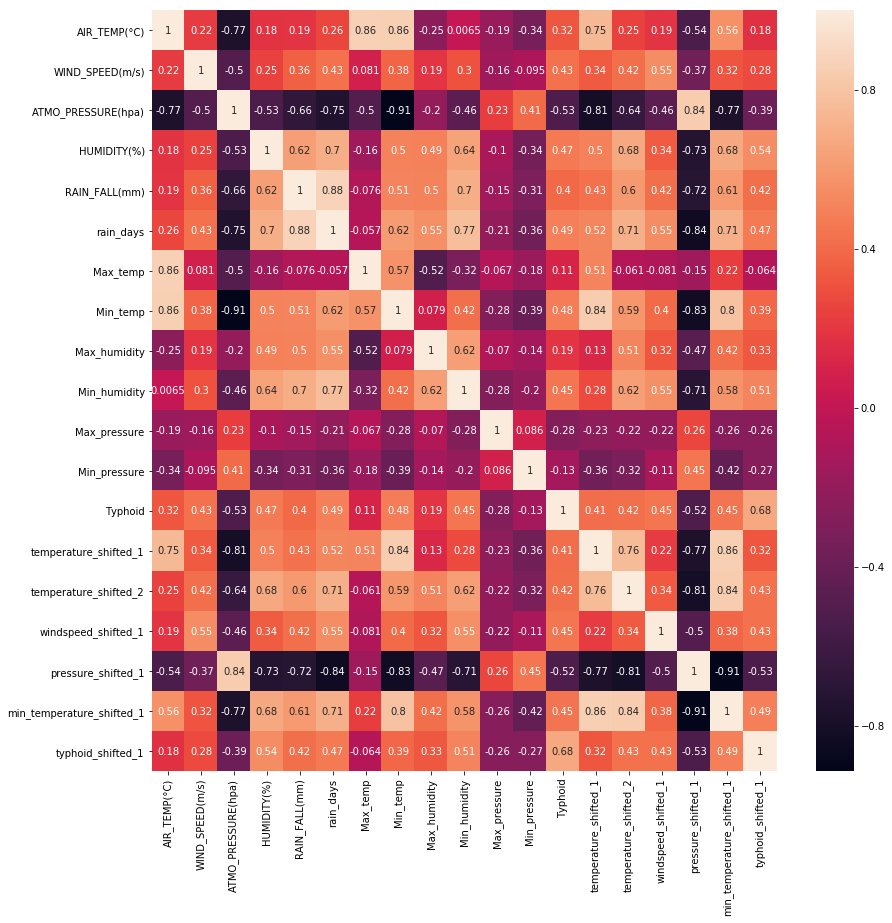

In [136]:
plt.figure(figsize=(14,14))
sns.heatmap(finalcsv_final_corr,annot=True)

In [137]:
finalcsv_final.iloc[-48:-36,12]

DATE(IST)
31-01-2016     46
29-02-2016     33
31-03-2016     44
30-04-2016     68
31-05-2016     57
30-06-2016     66
31-07-2016    114
31-08-2016     73
30-09-2016     74
31-10-2016     56
30-11-2016     45
31-12-2016     42
Name: Typhoid, dtype: int64

In [138]:
# finalcsv_final.columns

# dataset = pd.DataFrame()
# daterange = pd.date_range('2010-03-31',freq='M',periods=118)
# dataset['ds'] = daterange
# dataset['y'] = logged_typhoid_diff_diff[2:].values
# dataset['Temperature'] = finalcsv_final['AIR_TEMP(°C)'].values
# dataset['windspeed'] = finalcsv_final['WIND_SPEED(m/s)'].values
# dataset['pressure'] = finalcsv_final['ATMO_PRESSURE(hpa)'].values
# dataset['humidity'] = finalcsv_final['HUMIDITY(%)'].values
# dataset['rainfall'] = finalcsv_final['RAIN_FALL(mm)'].values
# dataset['raindays'] = finalcsv_final['rain_days'].values
# dataset['max_temp'] = finalcsv_final['Max_temp'].values
# dataset['min_temp'] = finalcsv_final['Min_temp'].values
# dataset['max_humidity'] = finalcsv_final['Max_humidity'].values
# dataset['min_humidity'] = finalcsv_final['Min_humidity'].values
# dataset['max_pressure'] = finalcsv_final['Max_pressure'].values
# dataset['min_pressure'] = finalcsv_final['Min_pressure'].values
# dataset['temperature_shifted_1'] = finalcsv_final['temperature_shifted_1'].values
# dataset['temperature_shifted_2'] = finalcsv_final['temperature_shifted_2'].values
# dataset['windspeed_shifted_1'] = finalcsv_final['windspeed_shifted_1'].values
# dataset['pressure_shifted_1'] = finalcsv_final['pressure_shifted_1'].values
# dataset['min_temperature_shifted_1'] = finalcsv_final['min_temperature_shifted_1'].values
# dataset['typhoid_shifted_1'] = finalcsv_final['typhoid_shifted_1'].values

# dataset.head()

# train_dataset = dataset.iloc[:106,:]
# test_dataset = dataset.iloc[106:,:]

# def is_gastroentrisis_season(ds):
#     date = pd.to_datetime(ds)
#     return (date.month > 4 and date.month < 10)

# train_dataset['on_season'] = dataset['ds'].apply(is_gastroentrisis_season)
# train_dataset['off_season'] = ~dataset['ds'].apply(is_gastroentrisis_season)

# train_dataset.columns

# pro_regressor = Prophet(yearly_seasonality=True,growth='linear',seasonality_mode='additive',
#                        seasonality_prior_scale=25)
# pro_regressor.add_seasonality(name='yearly_on_season', period=365, fourier_order=15, condition_name='on_season',
#                              prior_scale=0.5,mode='additive')
# pro_regressor.add_seasonality(name='yearly_off_season', period=365, fourier_order=15, condition_name='off_season',
#                              prior_scale=0.5,mode='additive')
# # pro_regressor.add_regressor('Temperature')
# # pro_regressor.add_regressor('windspeed')
# pro_regressor.add_regressor('pressure')
# # pro_regressor.add_regressor('humidity')
# # pro_regressor.add_regressor('rainfall')
# # pro_regressor.add_regressor('raindays')
# # pro_regressor.add_regressor('max_temp')
# # pro_regressor.add_regressor('min_temp')
# # pro_regressor.add_regressor('max_humidity')
# # pro_regressor.add_regressor('min_humidity')
# # pro_regressor.add_regressor('max_pressure')
# # pro_regressor.add_regressor('min_pressure')
# # pro_regressor.add_regressor('temperature_shifted_1')
# # pro_regressor.add_regressor('temperature_shifted_2')
# # pro_regressor.add_regressor('windspeed_shifted_1')
# pro_regressor.add_regressor('pressure_shifted_1')
# # pro_regressor.add_regressor('min_temperature_shifted_1')
# pro_regressor.add_regressor('typhoid_shifted_1')

# pro_regressor.fit(train_dataset)

# test_dataset['on_season'] = dataset['ds'].apply(is_gastroentrisis_season)
# test_dataset['off_season'] = ~dataset['ds'].apply(is_gastroentrisis_season)

# forecast_data = pro_regressor.predict(test_dataset)

# # fig = pro_regressor.plot_components(forecast_data)

# forecast_data

# test_dataset['y']

# print('Accuracy is {0}%'.format(math.ceil(r2_score(test_dataset['y'],forecast_data['yhat']) * 100)))

# fig = make_subplots()
# fig.add_trace(go.Scatter(y=test_dataset['y'],name='Actual'))
# fig.add_trace(go.Scatter(y=forecast_data['yhat'],name='Predicted'))

# logged_typhoid[-13:]

# logged_typhoid_diff[-13:]

# diff_diff_test = np.empty(len(test_dataset['y']))
# diff_diff_pred = np.empty(len(forecast_data['yhat']))



# logged_typhoid_diff_diff[-13:]

# for i in range(len(diff_diff_temp)):
#     diff_diff_test[i] = logged_typhoid_diff[-13+i] + test_dataset.iloc[i,1]
#     diff_diff_pred[i] = logged_typhoid_diff[-13+i] + forecast_data.iloc[i,-1]

# diff_diff_test



# # get_log_value_back_test = np.empty(len(test_dataset['y']))
# # get_log_value_back_pred = np.empty(len(forecast_data['yhat']))

# get_log_value_back_test = np.empty(len(diff_diff_test))
# get_log_value_back_pred = np.empty(len(diff_diff_pred))

# for i in range(len(test_dataset)):
#     get_log_value_back_pred[i] = logged_typhoid[-13+i] + diff_diff_pred[i]
#     get_log_value_back_test[i] = logged_typhoid[-13+i] + diff_diff_test[i]

# get_log_value_back_test

# get_log_value_back_pred

# get_log_value_back_pred_2 = np.empty(len(get_log_value_back_pred))
# get_log_value_back_test_2 = np.empty(len(get_log_value_back_test))

# get_log_value_back_test_2  = np.exp(get_log_value_back_test) 
# get_log_value_back_pred_2 = np.exp(get_log_value_back_pred)

# get_log_value_back_test_2

# fig = make_subplots()
# fig.add_trace(go.Scatter(y=get_log_value_back_test_2,name='Actual'))
# fig.add_trace(go.Scatter(y=get_log_value_back_pred_2,name='Predicted'))

# print('Accuracy is {0}%'.format(math.ceil(r2_score(get_log_value_back_test_2,get_log_value_back_pred_2) * 100)))

# mean_absolute_percentage_error(get_log_value_back_test_2,get_log_value_back_pred_2)

In [139]:
finalcsv_final_final= finalcsv_final.copy()

In [140]:
finalcsv_final_final.iloc[-45,12] = 35

In [141]:
finalcsv_final_final.columns

Index(['AIR_TEMP(°C)', 'WIND_SPEED(m/s)', 'ATMO_PRESSURE(hpa)', 'HUMIDITY(%)',
       'RAIN_FALL(mm)', 'rain_days', 'Max_temp', 'Min_temp', 'Max_humidity',
       'Min_humidity', 'Max_pressure', 'Min_pressure', 'Typhoid',
       'temperature_shifted_1', 'temperature_shifted_2', 'windspeed_shifted_1',
       'pressure_shifted_1', 'min_temperature_shifted_1', 'typhoid_shifted_1'],
      dtype='object')

In [142]:
len(finalcsv_final_final)

118

In [143]:
dataset = pd.DataFrame()
daterange = pd.date_range('2010-03-31',freq='M',periods=118)
dataset['ds'] = daterange
dataset['y'] = finalcsv_final_final['Typhoid'].values
dataset['Temperature'] = finalcsv_final_final['AIR_TEMP(°C)'].values
dataset['windspeed'] = finalcsv_final_final['WIND_SPEED(m/s)'].values
dataset['pressure'] = finalcsv_final_final['ATMO_PRESSURE(hpa)'].values
dataset['humidity'] = finalcsv_final_final['HUMIDITY(%)'].values
dataset['rainfall'] = finalcsv_final_final['RAIN_FALL(mm)'].values
dataset['raindays'] = finalcsv_final_final['rain_days'].values
dataset['max_temp'] = finalcsv_final_final['Max_temp'].values
dataset['min_temp'] = finalcsv_final_final['Min_temp'].values
dataset['max_humidity'] = finalcsv_final_final['Max_humidity'].values
dataset['min_humidity'] = finalcsv_final_final['Min_humidity'].values
dataset['max_pressure'] = finalcsv_final_final['Max_pressure'].values
dataset['min_pressure'] = finalcsv_final_final['Min_pressure'].values
dataset['temperature_shifted_1'] = finalcsv_final_final['temperature_shifted_1'].values
dataset['temperature_shifted_2'] = finalcsv_final_final['temperature_shifted_2'].values
dataset['windspeed_shifted_1'] = finalcsv_final_final['windspeed_shifted_1'].values
dataset['pressure_shifted_1'] = finalcsv_final_final['pressure_shifted_1'].values
dataset['min_temperature_shifted_1'] = finalcsv_final_final['min_temperature_shifted_1'].values
dataset['typhoid_shifted_1'] = finalcsv_final_final['typhoid_shifted_1'].values

In [144]:
dataset.head()

ds   y  Temperature  windspeed  pressure   humidity  rainfall  \
0 2010-03-31  27           29   0.699615    1010.0  51.418374       1.0   
1 2010-04-30  47           33   1.057895    1007.0  60.746518       1.0   
2 2010-05-31  42           35   1.326923    1003.0  65.298106       1.0   
3 2010-06-30  40           33   1.030000    1002.0  73.947877      91.2   
4 2010-07-31  49           29   2.054400    1001.0  81.560872     590.3   

   raindays  max_temp  min_temp  max_humidity  min_humidity  max_pressure  \
0         1        43        16            83             5          1100   
1         1        43        22            83             6          1012   
2         1        47        22            89             6          1099   
3        22        44        24            94            12          1023   
4        31        37        24           100            17          1101   

   min_pressure  temperature_shifted_1  temperature_shifted_2  \
0          1002                   24.0                   21.0   
1          1000                   29.0                   24.0   
2           996                   33.0                   29.0   
3           994                   35.0                   33.0   
4           987                   33.0                   35.0   

   windspeed_shifted_1  pressure_shifted_1  min_temperature_shifted_1  \
0             1.112308              1013.0                       12.0   
1             0.699615              1010.0                       16.0   
2             1.057895              1007.0                       22.0   
3             1.326923              1003.0                       22.0   
4             1.030000              1002.0                       24.0   

   typhoid_shifted_1  
0               18.0  
1               27.0  
2               47.0  
3               42.0  
4               40.0

In [145]:
train_dataset = dataset.iloc[:106,:]
test_dataset = dataset.iloc[106:,:]

In [146]:
def is_gastroentrisis_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 4 and date.month < 10)
# def is_main_monsoon(ds):
#     date = pd.to_datetime(ds)
#     if(date.month > 5 and date.month < 9):
#         return True
#     else:
#         return False
# def is_other_monsoon(ds):
#     date = pd.to_datetime(ds)
#     if(date.month == 5 or date.month == 9):
#         return True
#     else:
#         return False

# def is_other_months(ds):
#     date = pd.to_datetime(ds)
#     if(date.month < 5 or date.month > 9):
#         return True
#     else:
#         return False
def is_january(ds):
    date = pd.to_datetime(ds)
    if date.month == 1:
        return True
    else:
        return False
def is_february(ds):
    date = pd.to_datetime(ds)
    if date.month == 2:
        return True
    else:
        return False
def is_march(ds):
    date = pd.to_datetime(ds)
    if date.month == 3:
        return True
    else:
        return False
def is_april(ds):
    date = pd.to_datetime(ds)
    if date.month == 4:
        return True
    else:
        return False
def is_may(ds):
    date = pd.to_datetime(ds)
    if date.month == 5:
        return True
    else:
        return False
def is_june(ds):
    date = pd.to_datetime(ds)
    if date.month == 6:
        return True
    else:
        return False
def is_july(ds):
    date = pd.to_datetime(ds)
    if date.month == 7:
        return True
    else:
        return False
def is_august(ds):
    date = pd.to_datetime(ds)
    if date.month == 8:
        return True
    else:
        return False
def is_september(ds):
    date = pd.to_datetime(ds)
    if date.month == 9:
        return True
    else:
        return False
def is_october(ds):
    date = pd.to_datetime(ds)
    if date.month == 10:
        return True
    else:
        return False
def is_november(ds):
    date = pd.to_datetime(ds)
    if date.month == 11:
        return True
    else:
        return False
def is_december(ds):
    date = pd.to_datetime(ds)
    if date.month == 12:
        return True
    else:
        return False

In [147]:
train_dataset['on_season'] = dataset['ds'].apply(is_gastroentrisis_season)
train_dataset['off_season'] = ~dataset['ds'].apply(is_gastroentrisis_season)
train_dataset['is_january'] = dataset['ds'].apply(is_january)
train_dataset['is_february'] = dataset['ds'].apply(is_february)
train_dataset['is_march'] = dataset['ds'].apply(is_march)
train_dataset['is_april'] = dataset['ds'].apply(is_april)
train_dataset['is_may'] = dataset['ds'].apply(is_may)
train_dataset['is_june'] = dataset['ds'].apply(is_june)
train_dataset['is_july'] = dataset['ds'].apply(is_july)
train_dataset['is_august'] = dataset['ds'].apply(is_august)
train_dataset['is_september'] = dataset['ds'].apply(is_september)
train_dataset['is_october'] = dataset['ds'].apply(is_october)
train_dataset['is_november'] = dataset['ds'].apply(is_november)
train_dataset['is_december'] = dataset['ds'].apply(is_december)

In [148]:
train_dataset.head(14)

ds   y  Temperature  windspeed  pressure   humidity  rainfall  \
0  2010-03-31  27           29   0.699615    1010.0  51.418374      1.00   
1  2010-04-30  47           33   1.057895    1007.0  60.746518      1.00   
2  2010-05-31  42           35   1.326923    1003.0  65.298106      1.00   
3  2010-06-30  40           33   1.030000    1002.0  73.947877     91.20   
4  2010-07-31  49           29   2.054400    1001.0  81.560872    590.30   
5  2010-08-31  40           28   1.610526    1003.0  81.245991    561.30   
6  2010-09-30  23           28   0.750000    1006.0  70.472637    488.00   
7  2010-10-31  23           29   0.296552    1008.0  70.104412    103.20   
8  2010-11-30  36           25   0.829200    1011.0  68.944224      4.00   
9  2010-12-31   7           22   1.003571    1012.0  58.657407      0.16   
10 2011-01-31  24           22   1.062069    1014.0  48.980142      1.00   
11 2011-02-28  29           25   0.964000    1012.0  51.810767      1.00   
12 2011-03-31  47           30   0.860000    1010.0  46.041322      1.00   
13 2011-04-30  46           33   0.731034    1007.0  61.712428      1.00   

    raindays  max_temp  min_temp  ...  is_march  is_april  is_may  is_june  \
0          1        43        16  ...      True     False   False    False   
1          1        43        22  ...     False      True   False    False   
2          1        47        22  ...     False     False    True    False   
3         22        44        24  ...     False     False   False     True   
4         31        37        24  ...     False     False   False    False   
5         30        35        23  ...     False     False   False    False   
6         24        35        22  ...     False     False   False    False   
7         11        37        20  ...     False     False   False    False   
8         13        34        17  ...     False     False   False    False   
9          1        32        11  ...     False     False   False    False   
10         1        34        10  ...     False     False   False    False   
11         1        37        16  ...     False     False   False    False   
12         4        43        16  ...      True     False   False    False   
13         1        44        20  ...     False      True   False    False   

    is_july  is_august  is_september  is_october  is_november  is_december  
0     False      False         False       False        False        False  
1     False      False         False       False        False        False  
2     False      False         False       False        False        False  
3     False      False         False       False        False        False  
4      True      False         False       False        False        False  
5     False       True         False       False        False        False  
6     False      False          True       False        False        False  
7     False      False         False        True        False        False  
8     False      False         False       False         True        False  
9     False      False         False       False        False         True  
10    False      False         False       False        False        False  
11    False      False         False       False        False        False  
12    False      False         False       False        False        False  
13    False      False         False       False        False        False  

[14 rows x 34 columns]

In [149]:
train_dataset.head(12)

ds   y  Temperature  windspeed  pressure   humidity  rainfall  \
0  2010-03-31  27           29   0.699615    1010.0  51.418374      1.00   
1  2010-04-30  47           33   1.057895    1007.0  60.746518      1.00   
2  2010-05-31  42           35   1.326923    1003.0  65.298106      1.00   
3  2010-06-30  40           33   1.030000    1002.0  73.947877     91.20   
4  2010-07-31  49           29   2.054400    1001.0  81.560872    590.30   
5  2010-08-31  40           28   1.610526    1003.0  81.245991    561.30   
6  2010-09-30  23           28   0.750000    1006.0  70.472637    488.00   
7  2010-10-31  23           29   0.296552    1008.0  70.104412    103.20   
8  2010-11-30  36           25   0.829200    1011.0  68.944224      4.00   
9  2010-12-31   7           22   1.003571    1012.0  58.657407      0.16   
10 2011-01-31  24           22   1.062069    1014.0  48.980142      1.00   
11 2011-02-28  29           25   0.964000    1012.0  51.810767      1.00   

    raindays  max_temp  min_temp  ...  is_march  is_april  is_may  is_june  \
0          1        43        16  ...      True     False   False    False   
1          1        43        22  ...     False      True   False    False   
2          1        47        22  ...     False     False    True    False   
3         22        44        24  ...     False     False   False     True   
4         31        37        24  ...     False     False   False    False   
5         30        35        23  ...     False     False   False    False   
6         24        35        22  ...     False     False   False    False   
7         11        37        20  ...     False     False   False    False   
8         13        34        17  ...     False     False   False    False   
9          1        32        11  ...     False     False   False    False   
10         1        34        10  ...     False     False   False    False   
11         1        37        16  ...     False     False   False    False   

    is_july  is_august  is_september  is_october  is_november  is_december  
0     False      False         False       False        False        False  
1     False      False         False       False        False        False  
2     False      False         False       False        False        False  
3     False      False         False       False        False        False  
4      True      False         False       False        False        False  
5     False       True         False       False        False        False  
6     False      False          True       False        False        False  
7     False      False         False        True        False        False  
8     False      False         False       False         True        False  
9     False      False         False       False        False         True  
10    False      False         False       False        False        False  
11    False      False         False       False        False        False  

[12 rows x 34 columns]

In [150]:
# pro_regressor = Prophet(yearly_seasonality=True,growth='linear',seasonality_mode='additive',
#                        seasonality_prior_scale=25)
# pro_regressor.add_seasonality(name='on_season', period=365, fourier_order=15, condition_name='on_season',
#                              prior_scale=0.5,mode='additive')
# pro_regressor.add_seasonality(name='off_season', period=365, fourier_order=15, condition_name='off_season',
#                              prior_scale=0.5,mode='additive')
# pro_regressor.add_seasonality(name='is_january', period=365, fourier_order=15, condition_name='is_january',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_february', period=365, fourier_order=15, condition_name='is_february',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_march', period=365, fourier_order=15, condition_name='is_march',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_april', period=365, fourier_order=15, condition_name='is_april',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_may', period=365, fourier_order=15, condition_name='is_may',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_june', period=365, fourier_order=15, condition_name='is_june',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_july', period=365, fourier_order=15, condition_name='is_july',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_august', period=365, fourier_order=15, condition_name='is_august',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_september', period=365, fourier_order=15, condition_name='is_september',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_october', period=365, fourier_order=15, condition_name='is_october',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_november', period=365, fourier_order=15, condition_name='is_november',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_december', period=365, fourier_order=15, condition_name='is_december',
#                              prior_scale=0.7,mode='additive')
# # pro_regressor.add_regressor('Temperature')
# # # pro_regressor.add_regressor('windspeed')
# pro_regressor.add_regressor('pressure',prior_scale=0.9)
# # pro_regressor.add_regressor('humidity',prior_scale=0.88)
# # pro_regressor.add_regressor('rainfall',prior_scale=0.95)
# pro_regressor.add_regressor('raindays',prior_scale=0.8)
# # pro_regressor.add_regressor('max_temp')
# pro_regressor.add_regressor('min_temp',prior_scale=0.35)
# pro_regressor.add_regressor('max_humidity',prior_scale=0.7)


# pro_regressor.add_regressor('min_humidity',prior_scale=0.9)
# pro_regressor.add_regressor('max_pressure',prior_scale=0.9)
# # pro_regressor.add_regressor('min_pressure',prior_scale=0.9)

# # pro_regressor.add_regressor('temperature_shifted_1')
# # pro_regressor.add_regressor('temperature_shifted_2',prior_scale=0.95)
# # pro_regressor.add_regressor('windspeed_shifted_1')
# pro_regressor.add_regressor('pressure_shifted_1',prior_scale=0.5)
# # pro_regressor.add_regressor('min_temperature_shifted_1',prior_scale=0.8)
# pro_regressor.add_regressor('typhoid_shifted_1',prior_scale=0.04)

In [151]:
pro_regressor = Prophet(yearly_seasonality=True,growth='linear',seasonality_mode='additive',
                       seasonality_prior_scale=25)
pro_regressor.add_seasonality(name='on_season', period=365, fourier_order=15, condition_name='on_season',
                             prior_scale=0.5,mode='multiplicative')
pro_regressor.add_seasonality(name='off_season', period=365, fourier_order=15, condition_name='off_season',
                             prior_scale=0.5,mode='multiplicative')
pro_regressor.add_seasonality(name='is_january', period=365, fourier_order=15, condition_name='is_january',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_february', period=365, fourier_order=15, condition_name='is_february',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_march', period=365, fourier_order=15, condition_name='is_march',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_april', period=365, fourier_order=15, condition_name='is_april',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_may', period=365, fourier_order=15, condition_name='is_may',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_june', period=365, fourier_order=15, condition_name='is_june',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_july', period=365, fourier_order=15, condition_name='is_july',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_august', period=365, fourier_order=15, condition_name='is_august',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_september', period=365, fourier_order=15, condition_name='is_september',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_october', period=365, fourier_order=15, condition_name='is_october',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_november', period=365, fourier_order=15, condition_name='is_november',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_december', period=365, fourier_order=15, condition_name='is_december',
                             prior_scale=0.8,mode='multiplicative')
# pro_regressor.add_regressor('Temperature')
# # pro_regressor.add_regressor('windspeed')
pro_regressor.add_regressor('pressure',prior_scale=0.9)
# pro_regressor.add_regressor('humidity',prior_scale=0.9)
# pro_regressor.add_regressor('rainfall',prior_scale=0.95)
pro_regressor.add_regressor('raindays',prior_scale=0.8)
# pro_regressor.add_regressor('max_temp')
pro_regressor.add_regressor('min_temp',prior_scale=0.35)
# pro_regressor.add_regressor('max_humidity',prior_scale=0.7)

pro_regressor.add_regressor('min_humidity',prior_scale=0.9)
pro_regressor.add_regressor('max_pressure',prior_scale=0.9)
pro_regressor.add_regressor('min_pressure',prior_scale=0.9)

# pro_regressor.add_regressor('temperature_shifted_1')
# pro_regressor.add_regressor('temperature_shifted_2',prior_scale=0.95)
# pro_regressor.add_regressor('windspeed_shifted_1')
pro_regressor.add_regressor('pressure_shifted_1',prior_scale=0.5)
# pro_regressor.add_regressor('min_temperature_shifted_1',prior_scale=0.8)
pro_regressor.add_regressor('typhoid_shifted_1',prior_scale=0.04)

In [152]:
pro_regressor.fit(train_dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [153]:
test_dataset['on_season'] =test_dataset['ds'].apply(is_gastroentrisis_season)
test_dataset['off_season'] = ~test_dataset['ds'].apply(is_gastroentrisis_season)
test_dataset['is_january'] =test_dataset['ds'].apply(is_january)
test_dataset['is_february'] =test_dataset['ds'].apply(is_february)
test_dataset['is_march'] =test_dataset['ds'].apply(is_march)
test_dataset['is_april'] =test_dataset['ds'].apply(is_april)
test_dataset['is_may'] =test_dataset['ds'].apply(is_may)
test_dataset['is_june'] =test_dataset['ds'].apply(is_june)
test_dataset['is_july'] =test_dataset['ds'].apply(is_july)
test_dataset['is_august'] =test_dataset['ds'].apply(is_august)
test_dataset['is_september'] =test_dataset['ds'].apply(is_september)
test_dataset['is_october'] =test_dataset['ds'].apply(is_october)
test_dataset['is_november'] =test_dataset['ds'].apply(is_november)
test_dataset['is_december'] =test_dataset['ds'].apply(is_december)

In [154]:
forecast_data = pro_regressor.predict(test_dataset)

In [155]:
# fig = pro_regressor.plot_components(forecast_data)

forecast_data

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2019-01-31  47.069781   19.842067   49.538597    47.069781    47.069781   
1  2019-02-28  47.049354   13.666145   42.837305    47.049354    47.049354   
2  2019-03-31  47.026740   13.814206   43.884852    47.026740    47.026740   
3  2019-04-30  47.004855   18.921190   47.678935    47.004855    47.004855   
4  2019-05-31  46.982240   20.363662   49.357480    46.982240    46.982240   
5  2019-06-30  46.960355   30.746357   59.217591    46.960355    46.960355   
6  2019-07-31  46.937740   48.260073   76.547809    46.937740    46.937740   
7  2019-08-31  46.915126   50.913452   78.954230    46.915126    46.915126   
8  2019-09-30  46.893241   43.199090   72.932779    46.893240    46.893241   
9  2019-10-31  46.870626   40.744131   69.551204    46.870626    46.870626   
10 2019-11-30  46.848741   30.117072   59.794626    46.848741    46.848741   
11 2019-12-31  46.826126   32.024471   60.484042    46.826126    46.826127   

    additive_terms  additive_terms_lower  additive_terms_upper  \
0       -18.784544            -18.784544            -18.784544   
1       -33.353437            -33.353437            -33.353437   
2       -28.858814            -28.858814            -28.858814   
3       -12.825686            -12.825686            -12.825686   
4       -13.318847            -13.318847            -13.318847   
5         4.552767              4.552767              4.552767   
6        24.663623             24.663623             24.663623   
7        15.258616             15.258616             15.258616   
8        20.076211             20.076211             20.076211   
9        11.315400             11.315400             11.315400   
10       -1.132421             -1.132421             -1.132421   
11      -12.333146            -12.333146            -12.333146   

    extra_regressors_additive  ...  raindays  raindays_lower  raindays_upper  \
0                  -24.331267  ... -0.053557       -0.053557       -0.053557   
1                  -31.578949  ... -0.053557       -0.053557       -0.053557   
2                  -34.189554  ... -0.053557       -0.053557       -0.053557   
3                  -16.130231  ... -0.053557       -0.053557       -0.053557   
4                  -14.232630  ... -0.053557       -0.053557       -0.053557   
5                   -0.537648  ...  0.067838        0.067838        0.067838   
6                   10.835897  ...  0.160670        0.160670        0.160670   
7                   29.622389  ...  0.160670        0.160670        0.160670   
8                   31.968515  ...  0.153529        0.153529        0.153529   
9                   20.195393  ... -0.046416       -0.046416       -0.046416   
10                  -2.306308  ... -0.053557       -0.053557       -0.053557   
11                 -14.905303  ... -0.053557       -0.053557       -0.053557   

    typhoid_shifted_1  typhoid_shifted_1_lower  typhoid_shifted_1_upper  \
0           -4.327306                -4.327306                -4.327306   
1           -7.806656                -7.806656                -7.806656   
2          -16.505033               -16.505033               -16.505033   
3           -7.226765                -7.226765                -7.226765   
4          -16.505033               -16.505033               -16.505033   
5           -4.907197                -4.907197                -4.907197   
6           -7.226765                -7.226765                -7.226765   
7            8.430314                 8.430314                 8.430314   
8           10.169989                10.169989                10.169989   
9           12.489556                12.489556                12.489556   
10           0.891720                 0.891720                 0.891720   
11          -2.007739                -2.007739                -2.007739   

       yearly  yearly_lower  yearly_upper       yhat  
0    5.546724      5.546724      5.546724  34.516106  
1   -1.774

In [156]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(test_dataset['y'],forecast_data['yhat']) * 100)))

Accuracy is 76%


In [157]:
mean_absolute_percentage_error(test_dataset['y'],forecast_data['yhat'])

19.305370907637233

In [158]:
fig = make_subplots()
fig.add_trace(go.Scatter(y=test_dataset['y'],name='Actual'))
fig.add_trace(go.Scatter(y=forecast_data['yhat'],name='Predicted'))

In [159]:
pro_regressor.changepoints

3    2010-06-30
7    2010-10-31
10   2011-01-31
13   2011-04-30
17   2011-08-31
20   2011-11-30
23   2012-02-29
27   2012-06-30
30   2012-09-30
33   2012-12-31
37   2013-04-30
40   2013-07-31
43   2013-10-31
46   2014-01-31
50   2014-05-31
53   2014-08-31
56   2014-11-30
60   2015-03-31
63   2015-06-30
66   2015-09-30
70   2016-01-31
73   2016-04-30
76   2016-07-31
80   2016-11-30
83   2017-02-28
Name: ds, dtype: datetime64[ns]

In [160]:
logged_typhoid[-13:]

DATE(IST)
31-12-2018    3.737670
31-01-2019    3.583519
28-02-2019    3.044522
31-03-2019    3.610918
30-04-2019    3.044522
31-05-2019    3.713572
30-06-2019    3.610918
31-07-2019    4.158883
31-08-2019    4.204693
30-09-2019    4.262680
31-10-2019    3.931826
30-11-2019    3.828641
31-12-2019    3.465736
Name: Typhoid, dtype: float64

In [161]:
logged_typhoid_diff[-12:]

DATE(IST)
31-01-2019   -0.154151
28-02-2019   -0.538997
31-03-2019    0.566395
30-04-2019   -0.566395
31-05-2019    0.669050
30-06-2019   -0.102654
31-07-2019    0.547965
31-08-2019    0.045810
30-09-2019    0.057987
31-10-2019   -0.330854
30-11-2019   -0.103184
31-12-2019   -0.362905
Name: Typhoid, dtype: float64

In [162]:
# get_log_value_back_test = np.empty(len(test_dataset['y']))
# get_log_value_back_pred = np.empty(len(forecast_data['yhat']))

# for i in range(len(test_dataset)):
#     get_log_value_back_pred[i] = logged_typhoid[-13+i] + forecast_data.iloc[i,-1]
#     get_log_value_back_test[i] = logged_typhoid[-13+i] + test_dataset.iloc[i,1]

# get_log_value_back_pred

# get_log_value_back_pred_2 = np.empty(len(get_log_value_back_pred))
# get_log_value_back_test_2 = np.empty(len(get_log_value_back_test))

# get_log_value_back_test_2  = np.exp(get_log_value_back_test) 
# get_log_value_back_pred_2 = np.exp(get_log_value_back_pred)

# get_log_value_back_test_2

# fig = make_subplots()
# fig.add_trace(go.Scatter(y=get_log_value_back_test_2,name='Actual'))
# fig.add_trace(go.Scatter(y=get_log_value_back_pred_2,name='Predicted'))

# print('Accuracy is {0}%'.format(math.ceil(r2_score(get_log_value_back_test_2,get_log_value_back_pred_2) * 100)))

# mean_absolute_percentage_error(get_log_value_back_test_2,get_log_value_back_pred_2)

In [163]:
typhoid_acf = acf(logged_typhoid_diff[2:],nlags=120,fft=False)
px.line(y=typhoid_acf)

In [164]:
typhoid_pacf = pacf(logged_typhoid_diff[2:],nlags=64)
px.line(y=typhoid_pacf)

In [165]:
auto_arima(logged_typhoid_diff[2:],start_p=0,start_q=0,start_P=0,start_Q=0,trend='n',m=12,alpha=0.1)

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 1), out_of_sample_size=0,
   scoring='mse', scoring_args=None, seasonal_order=(1, 0, 1, 12),
   start_params=None, suppress_warnings=False, trend='n',
   with_intercept=True)

In [166]:
finalcsv_final.columns

Index(['AIR_TEMP(°C)', 'WIND_SPEED(m/s)', 'ATMO_PRESSURE(hpa)', 'HUMIDITY(%)',
       'RAIN_FALL(mm)', 'rain_days', 'Max_temp', 'Min_temp', 'Max_humidity',
       'Min_humidity', 'Max_pressure', 'Min_pressure', 'Typhoid',
       'temperature_shifted_1', 'temperature_shifted_2', 'windspeed_shifted_1',
       'pressure_shifted_1', 'min_temperature_shifted_1', 'typhoid_shifted_1'],
      dtype='object')

In [167]:
len(finalcsv_final)

118

In [168]:
finalcsv_final_corr = finalcsv_final.corr()

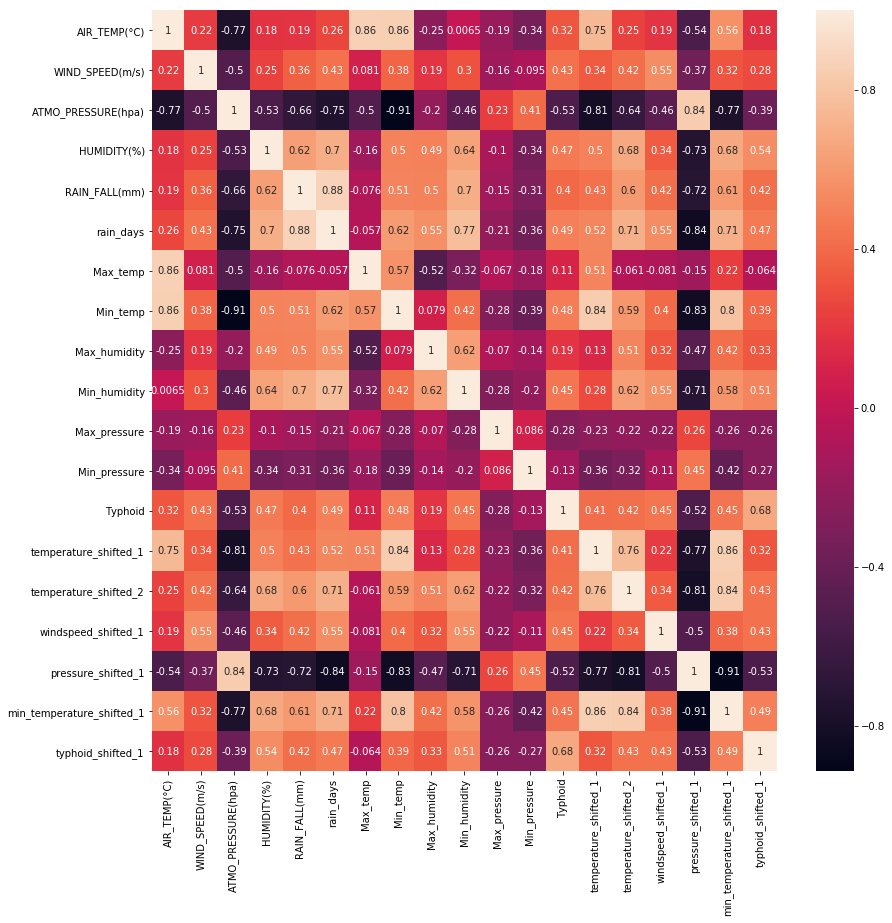

In [169]:
plt.figure(figsize=(14,14))
sns.heatmap(finalcsv_final_corr,annot=True)

In [170]:
haaa = []

In [171]:
for i in range(10,118,12):
    temp_corr_table = finalcsv_final.iloc[i:i+12,:].corr()
    haaa.append(temp_corr_table[abs(temp_corr_table.iloc[0:,12]) > 0.5].iloc[:,12])
    print(i)

10
22
34
46
58
70
82
94
106


In [172]:
haaa

[AIR_TEMP(°C)                 0.601079
 WIND_SPEED(m/s)              0.516642
 ATMO_PRESSURE(hpa)          -0.680373
 HUMIDITY(%)                  0.611920
 rain_days                    0.534762
 Min_temp                     0.630186
 Max_pressure                -0.722039
 Typhoid                      1.000000
 temperature_shifted_1        0.866841
 temperature_shifted_2        0.730517
 pressure_shifted_1          -0.620530
 min_temperature_shifted_1    0.775582
 typhoid_shifted_1            0.692887
 Name: Typhoid, dtype: float64, AIR_TEMP(°C)           0.569426
 WIND_SPEED(m/s)        0.612910
 ATMO_PRESSURE(hpa)    -0.762727
 HUMIDITY(%)            0.553519
 rain_days              0.582161
 Min_temp               0.651161
 Max_pressure          -0.682910
 Typhoid                1.000000
 windspeed_shifted_1    0.750673
 pressure_shifted_1    -0.578140
 Name: Typhoid, dtype: float64, AIR_TEMP(°C)                 0.788436
 ATMO_PRESSURE(hpa)          -0.910310
 HUMIDITY(%)           

In [173]:
j=0
for i in range(2011,2020,1):
    print('For year',i,":")
    print(haaa[j])
    j+=1
    print("\n\n")

For year 2011 :
AIR_TEMP(°C)                 0.601079
WIND_SPEED(m/s)              0.516642
ATMO_PRESSURE(hpa)          -0.680373
HUMIDITY(%)                  0.611920
rain_days                    0.534762
Min_temp                     0.630186
Max_pressure                -0.722039
Typhoid                      1.000000
temperature_shifted_1        0.866841
temperature_shifted_2        0.730517
pressure_shifted_1          -0.620530
min_temperature_shifted_1    0.775582
typhoid_shifted_1            0.692887
Name: Typhoid, dtype: float64



For year 2012 :
AIR_TEMP(°C)           0.569426
WIND_SPEED(m/s)        0.612910
ATMO_PRESSURE(hpa)    -0.762727
HUMIDITY(%)            0.553519
rain_days              0.582161
Min_temp               0.651161
Max_pressure          -0.682910
Typhoid                1.000000
windspeed_shifted_1    0.750673
pressure_shifted_1    -0.578140
Name: Typhoid, dtype: float64



For year 2013 :
AIR_TEMP(°C)                 0.788436
ATMO_PRESSURE(hpa)          -0.910

In [174]:
finalcsv_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 31-03-2010 to 31-12-2019
Data columns (total 19 columns):
AIR_TEMP(°C)                 118 non-null int64
WIND_SPEED(m/s)              118 non-null float64
ATMO_PRESSURE(hpa)           118 non-null float64
HUMIDITY(%)                  118 non-null float64
RAIN_FALL(mm)                118 non-null float64
rain_days                    118 non-null int64
Max_temp                     118 non-null int64
Min_temp                     118 non-null int64
Max_humidity                 118 non-null int64
Min_humidity                 118 non-null int64
Max_pressure                 118 non-null int64
Min_pressure                 118 non-null int64
Typhoid                      118 non-null int64
temperature_shifted_1        118 non-null float64
temperature_shifted_2        118 non-null float64
windspeed_shifted_1          118 non-null float64
pressure_shifted_1           118 non-null float64
min_temperature_shifted_1    118 non-null float64
ty

In [175]:
fig = make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[:].index,y=finalcsv_final.iloc[:,0],name='AIR_TEMP(°C)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[:].index,y=finalcsv_final.iloc[:,1],name='WIND_SPEED(m/s)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[:].index,y=finalcsv_final.iloc[:,2],name='ATMO_PRESSURE(hpa)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[:].index,y=finalcsv_final.iloc[:,3],name='HUMIDITY(%)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[:].index,y=finalcsv_final.iloc[:,4],name='RAIN_FALL(mm)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[:].index,y=finalcsv_final.iloc[:,5],name='rain_days'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[:].index,y=finalcsv_final.iloc[:,6],name='Max_temp'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[:].index,y=finalcsv_final.iloc[:,7],name='Min_temp'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[:].index,y=finalcsv_final.iloc[:,8],name='Max_humidity'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[:].index,y=finalcsv_final.iloc[:,9],name='Min_humidity'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[:].index,y=finalcsv_final.iloc[:,10],name='Max_pressure'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[:].index,y=finalcsv_final.iloc[:,11],name='Min_pressure'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[:].index,y=finalcsv_final.iloc[:,13],name='min_temperature_shift_1'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[:].index,y=finalcsv_final.iloc[:,12],name='Typhoid'))

In [176]:
fig = make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[-36:].index,y=finalcsv_final.iloc[-36:,0],name='AIR_TEMP(°C)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[-36:].index,y=finalcsv_final.iloc[-36:,1],name='WIND_SPEED(m/s)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[-36:].index,y=finalcsv_final.iloc[-36:,2],name='ATMO_PRESSURE(hpa)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[-36:].index,y=finalcsv_final.iloc[-36:,3],name='HUMIDITY(%)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[-36:].index,y=finalcsv_final.iloc[-36:,4],name='RAIN_FALL(mm)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[-36:].index,y=finalcsv_final.iloc[-36:,5],name='rain_days'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[-36:].index,y=finalcsv_final.iloc[-36:,6],name='Max_temp'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[-36:].index,y=finalcsv_final.iloc[-36:,7],name='Min_temp'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[-36:].index,y=finalcsv_final.iloc[-36:,8],name='Max_humidity'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[-36:].index,y=finalcsv_final.iloc[-36:,9],name='Min_humidity'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[-36:].index,y=finalcsv_final.iloc[-36:,10],name='Max_pressure'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[-36:].index,y=finalcsv_final.iloc[-36:,11],name='Min_pressure'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[-36:].index,y=finalcsv_final.iloc[-36:,13],name='temperature_shift_1'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv_final.iloc[-36:].index,y=finalcsv_final.iloc[-36:,12],name='Typhoid'))

In [177]:
fig = make_subplots(rows=3,cols=1)
fig.add_trace(go.Scatter(y=finalcsv_final.iloc[-36:,3],name='Relative Humidity'),row=1,col=1)
fig.add_trace(go.Scatter(y=finalcsv_final.iloc[-36:,9],name='Min Humidity'),row=2,col=1)
fig.add_trace(go.Scatter(y=finalcsv_final.iloc[-36:,12],name='Typhoid'),row=3,col=1)
fig.update_layout(height=600, width=800)

In [178]:
fig = make_subplots()
fig.add_trace(go.Scatter(y=finalcsv_final.iloc[-120:-108,12],name='year-2010'))
fig.add_trace(go.Scatter(y=finalcsv_final.iloc[-108:-96,12],name='year-2011'))
fig.add_trace(go.Scatter(y=finalcsv_final.iloc[-96:-84,12],name='year-2012'))
fig.add_trace(go.Scatter(y=finalcsv_final.iloc[-84:-72,12],name='year-2013'))
fig.add_trace(go.Scatter(y=finalcsv_final.iloc[-72:-60,12],name='year-2014'))
fig.add_trace(go.Scatter(y=finalcsv_final.iloc[-60:-48,12],name='year-2015'))
fig.add_trace(go.Scatter(y=finalcsv_final.iloc[-48:-36,12],name='year-2016'))
fig.add_trace(go.Scatter(y=finalcsv_final.iloc[-36:-24,12],name='year-2017'))
fig.add_trace(go.Scatter(y=finalcsv_final.iloc[-24:-12,12],name='year-2018'))
fig.add_trace(go.Scatter(y=finalcsv_final.iloc[-12:,12],name='year-2019'))
fig.update_layout(title_text='Gastroenteritis cases throughout years-Month-wise splitted')

In [179]:
bar_df = pd.DataFrame()
bar_df['temperature'] = np.NaN
bar_df['humidity'] = np.NaN
bar_df['max_humidity'] = np.NaN
bar_df['typhoid'] = np.NaN


In [180]:
finalcsv_final.columns

Index(['AIR_TEMP(°C)', 'WIND_SPEED(m/s)', 'ATMO_PRESSURE(hpa)', 'HUMIDITY(%)',
       'RAIN_FALL(mm)', 'rain_days', 'Max_temp', 'Min_temp', 'Max_humidity',
       'Min_humidity', 'Max_pressure', 'Min_pressure', 'Typhoid',
       'temperature_shifted_1', 'temperature_shifted_2', 'windspeed_shifted_1',
       'pressure_shifted_1', 'min_temperature_shifted_1', 'typhoid_shifted_1'],
      dtype='object')

In [181]:
j = 0
for i in range(1,118,12):
    bar_df.loc[j,'temperature'] = finalcsv_final.iloc[i,0]
    bar_df.loc[j,'humidity'] = finalcsv_final.iloc[i,3]
    bar_df.loc[j,'max_humidity'] = finalcsv_final.iloc[i,8]
    bar_df.loc[j,'typhoid'] = finalcsv_final.iloc[i,12]
    j+=1

In [182]:
bar_df

temperature   humidity  max_humidity  typhoid
0         33.0  60.746518          83.0     47.0
1         33.0  61.712428          74.0     46.0
2         34.0  64.735234          83.0     61.0
3         32.0  59.022989          79.0     69.0
4         33.0  44.537931          88.0     69.0
5         33.0  53.513274          83.0     23.0
6         33.0  62.225575          74.0     68.0
7         32.0  36.000000         100.0     29.0
8         34.0  31.000000          70.0     43.0
9         34.0  56.540870          74.0     21.0

In [183]:
list1 = list(range(2010,2020,1))

In [184]:
list1

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [185]:
bar_df.iplot(kind='bar')

In [186]:
tempcsv = finalcsv_final.copy()
gastro_x = tempcsv.drop(['AIR_TEMP(°C)', 'WIND_SPEED(m/s)','HUMIDITY(%)',
       'RAIN_FALL(mm)', 'Max_temp', 'Max_humidity',
       'Min_humidity', 'Max_pressure', 'Min_pressure', 'Typhoid',
       'temperature_shifted_1', 'temperature_shifted_2', 'windspeed_shifted_1', 'min_temperature_shifted_1'],axis=1)
gastro_y= logged_typhoid_diff[2:]

In [187]:
scaler1 = MinMaxScaler(feature_range=(0,1))
# scaler2 = MinMaxScaler(feature_range=(0,1))

In [188]:
# temp = gastro_y.reshape(-1,1)

In [189]:
scaled_x = scaler1.fit_transform(gastro_x)
# scaled_y = scaler2.fit_transform(temp)

c:\users\madhav\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [190]:
gastro_X_train,gastro_X_test,gastro_y_train,gastro_y_test = train_test_split(scaled_x,gastro_y,test_size=0.1,shuffle=False)

In [191]:
len(gastro_X_test)

12

In [192]:
auto_predict = np.empty(len(gastro_y_test))
auto_history_X = [x for x in gastro_X_train]
auto_history_y = [y for y in gastro_y_train]

for i in range(len(gastro_X_test)):
    auto_model =SARIMAX(auto_history_y,exog=auto_history_X,trend='n', order=(1,1,1), seasonal_order=(1,1,1,12),enforce_invertibility=False,
                       enforce_stationarity=False)
    auto_result = auto_model.fit()
    auto_output = auto_result.forecast(exog=gastro_X_test[i])
    auto_predict[i] = auto_output[0]
    auto_history_y.append(gastro_y_test[i])
    auto_history_X.append(gastro_X_test[i])
    print('predicted={0}/texpected={1}'.format(auto_output[0],gastro_y_test[i]))

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-0.35646262873841406/texpected=-0.1541506798272585
predicted=-0.11429502646650169/texpected=-0.5389965007326869


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.3032564978348369/texpected=0.5663954749208013
predicted=0.13547896001051107/texpected=-0.5663954749208013


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.2891268361079292/texpected=0.6690496289808849


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.15847961713310033/texpected=-0.1026541540600836
predicted=0.3987333484362663/texpected=0.5479651707154471


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.0932301233051564/texpected=0.04580953603129423


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-0.03591178746108925/texpected=0.05798725765034973


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-0.3659353683056177/texpected=-0.33085424431698973


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=-0.06782348367954216/texpected=-0.10318423623523065
predicted=0.05912577656678675/texpected=-0.36290549368936853


c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [193]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(gastro_y_test,auto_predict) * 100)))

Accuracy is 39%


In [194]:
real_diff_pred_2 = np.empty(len(auto_predict))
real_diff_test_2 = np.empty(len(gastro_y_test))

In [195]:
len(real_diff_pred_2)

12

In [196]:
for i in range(len(auto_predict)):
    real_diff_pred_2[i] = logged_typhoid[-13+i] + auto_predict[i]
    real_diff_test_2[i] = logged_typhoid[-13+i] + gastro_y_test[i]

In [197]:
typhoid_pred_temp_2= np.empty(len(real_diff_pred_2))
typhoid_test_temp_2= np.empty(len(real_diff_test_2))

In [198]:
typhoid_pred_temp_2 = np.exp(real_diff_pred_2)
typhoid_test_temp_2 = np.exp(real_diff_test_2)

In [199]:
# for i in range(len(typhoid_pred_temp_2)):
#     typhoid_pred_temp_2[i] = invert_boxcox(real_diff_pred_2[i],lambda_typhoid)
#     typhoid_test_temp_2[i] = invert_boxcox(real_diff_test_2[i],lambda_typhoid)

In [200]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(typhoid_test_temp_2,typhoid_pred_temp_2) * 100)))

Accuracy is 55%


In [201]:
mean_absolute_percentage_error(typhoid_test_temp_2,typhoid_pred_temp_2)

28.733484280022008

In [202]:
fig = make_subplots()
fig.add_trace(go.Scatter(y=typhoid_test_temp_2,name='Actual'))
fig.add_trace(go.Scatter(y=typhoid_pred_temp_2,name='Predicted'))

In [203]:
# tempcsv = typhoid_df_final_final.copy()
# gastro_x = tempcsv.drop(['Temperature','Rainfall', 'Typhoid','windspeed_shifted_1','Relative Humidity',
#                          'temperature_shifed_1','Wind speed'],axis=1)
# gastro_y= tempcsv['Typhoid']

Exponential Smoothing

In [204]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# exp_model = ExponentialSmoothing(logged_typhoid[2:106],trend='mul',seasonal='add',
#                                  seasonal_periods=12,freq='M')

# exp_fit = exp_model.fit(use_brute=True,use_boxcox=True,remove_bias=True,smoothing_level=0.9,
#                        smoothing_slope=0.02)

# yhat = exp_fit.predict(start='2019-01-31',end='2019-12-31')

# yhat

# print('Accuracy is {0}%'.format(math.ceil(r2_score(logged_typhoid[-12:],yhat) * 100)))

# fig = make_subplots()
# fig.add_trace(go.Scatter(y=logged_typhoid[-12:],name='Actual'))
# fig.add_trace(go.Scatter(y=yhat,name='Predicted'))

In [205]:
# sns.pairplot(finalcsv_final)

In [206]:
pearsonr(finalcsv_final.iloc[:,12],finalcsv_final.iloc[:,1]) 
# pearson's correlation

(0.4276111953192242, 1.3678733892368683e-06)

XGBOOST

In [207]:
from xgboost import XGBRegressor,plot_importance,plot_tree

In [208]:
# XGB_full_pred = []
# for i in range(0,12):
#     if i == 0:
#         temp_finalcsv_1 = finalcsv_final.iloc[12:,:]
#     else:
#         temp_finalcsv_1 = finalcsv_final.iloc[12:-i,:]
#     X = temp_finalcsv_1.drop(['AIR_TEMP(°C)', 'WIND_SPEED(m/s)','HUMIDITY(%)',
#        'RAIN_FALL(mm)','Max_temp', 'Min_temp', 'Max_humidity',
#        'Min_humidity', 'Max_pressure', 'Min_pressure', 'Typhoid',
#        'temperature_shifted_1', 'temperature_shifted_2', 'windspeed_shifted_1','min_temperature_shifted_1'],axis=1)
#     y = temp_finalcsv_1['Typhoid']
#     X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.0000999,shuffle=False)
#     model = XGBRegressor(max_depth=4,n_estimators=100,colsample_bytree=0.3, 
#                         subsample=0.8, eta=0.3,seed=42,booster='gbtree')
#     model.fit(X_train, y_train, eval_metric="rmse")
#     yhat_XGB  = model.predict(X_test)
#     XGB_full_pred.append(int(yhat_XGB))

In [209]:
# # plot_importance(model_fit,height=0.9)
# # model.get_booster().get_score(importance_type='weight')
# # model_fit.feature_importances_
# # plot_tree(model._Booster)

In [210]:
# XGB_full_pred[::-1]

In [211]:
# diseaseList.iloc[-12:,0]

In [212]:
# X_train.columns

In [213]:
# print('Accuracy is {0}%'.format(math.ceil(r2_score(diseaseList.iloc[-12:,0],XGB_full_pred[::-1]) * 100)))

# mean_absolute_percentage_error(diseaseList.iloc[-12:,0],XGB_full_pred[::-1])

In [214]:
# plt.figure(figsize=(14,14))
# sns.heatmap(finalcsv_final_corr,annot=True)

In [215]:
# minmax = MinMaxScaler(feature_range=(0,1))

# finalcsv_final.columns

# scaled_finalcsv_final = minmax.fit_transform(finalcsv_final_final)

# scaled_finalcsv_final  = pd.DataFrame(scaled_finalcsv_final,columns=finalcsv_final.columns)

# X = scaled_finalcsv_final.drop(['Typhoid'],axis=1)
# y = scaled_finalcsv_final['Typhoid']

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,shuffle=False)

# xg_reg = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.034,
#                             max_depth = 5, alpha = 15, n_estimators = 100,gamma=0.016,random_state=25)

# xg_reg.fit(X_train, y_train)

# yhat_XGB  = xg_reg.predict(X_test)

# px.bar(y=xg_reg.feature_importances_,x=X.columns)



# X = scaled_finalcsv_final.drop(['AIR_TEMP(°C)', 'WIND_SPEED(m/s)',
#        'RAIN_FALL(mm)', 'Max_temp', 'Min_temp', 'Max_humidity',
#        'Min_humidity', 'Max_pressure', 'Min_pressure','Typhoid',
#        'temperature_shifted_1', 'temperature_shifted_2', 'windspeed_shifted_1',
#        'min_temperature_shifted_1'],axis=1)
# y = scaled_finalcsv_final['Typhoid']

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,shuffle=False)

# xg_reg = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.035,
#                             max_depth = 4, alpha = 25, n_estimators = 100,gamma=0.016,random_state=25,importance_type='cover')

# X_train.columns

# xg_reg.fit(X_train, y_train)

# yhat_XGB  = xg_reg.predict(X_test)

# fig = make_subplots()
# fig.add_trace(go.Scatter(y=y_test,name='Actual'))
# fig.add_trace(go.Scatter(y=yhat_XGB,name='Predicted'))

# print('Accuracy is {0}%'.format(math.ceil(r2_score(y_test,yhat_XGB) * 100)))

# # xgb_test_diff = np.empty(len(y_test))
# # xgb_pred_diff = np.empty(len(yhat_XGB))

# # for i in range(len(y_test)):
# #     xgb_test_diff[i] = logged_typhoid[-13+i] + y_test[i]
# #     xgb_pred_diff[i] = logged_typhoid[-13+i] + yhat_XGB[i]

# # xgb_test_diff

# # boxcox_test = np.empty(len(xgb_test_diff))
# # boxcox_pred = np.empty(len(xgb_pred_diff))

# # for i in range(len(boxcox_test)):
# #     boxcox_test[i] = invert_boxcox(xgb_test_diff[i],lambda_typhoid)
# #     boxcox_pred[i] = invert_boxcox(xgb_pred_diff[i],lambda_typhoid)

# # fig = make_subplots()
# # fig.add_trace(go.Scatter(y=boxcox_test,name='Actual'))
# # fig.add_trace(go.Scatter(y=boxcox_pred,name='Predicted'))

In [216]:
# X.columns

In [217]:
# X_3 = scaled_finalcsv_final.drop(['AIR_TEMP(°C)', 'WIND_SPEED(m/s)',
#        'RAIN_FALL(mm)', 'rain_days', 'Max_temp', 'Max_humidity',
#        'Min_humidity', 'Max_pressure', 'Min_pressure', 'Typhoid',
#        'temperature_shifted_1', 'temperature_shifted_2', 'windspeed_shifted_1','min_temperature_shifted_1'],axis=1)
# y_3 = scaled_finalcsv_final['Typhoid']

# X3_train,X3_test,y3_train,y3_test = train_test_split(X_3,y_3,test_size=0.1,shuffle=False)

# gbm = XGBRegressor(learning_rate=0.034)

# reg_cv = GridSearchCV(gbm, {"colsample_bytree":[0.3,0.4,0.5,0.6,0.7,0.8,0.9],"min_child_weight":[100,200,300]
#                             ,'max_depth': [3,4,6,7,8], 'n_estimators': [100]}, verbose=1)

# reg_cv.fit(X3_train,y3_train)

# reg_cv.best_params_

# gbm = XGBRegressor(**reg_cv.best_params_)

# gbm.fit(X3_train,y3_train)

# X3_test

# predictions = gbm.predict(X3_test)

# predictions

In [218]:
# 'AIR_TEMP(°C)', 'WIND_SPEED(m/s)', 'ATMO_PRESSURE(hpa)', 'HUMIDITY(%)',
#        'RAIN_FALL(mm)', 'rain_days', 'Max_temp', 'Min_temp', 'Max_humidity',
#        'Min_humidity', 'Max_pressure', 'Min_pressure', 'Typhoid',
#        'temperature_shifted_1', 'temperature_shifted_2', 'windspeed_shifted_1',
#        'pressure_shifted_1', 'min_temperature_shifted_1', 'typhoid_shifted_1'

In [219]:
# svm_x = scaled_finalcsv_final[['typhoid_shifted_1','pressure_shifted_1','ATMO_PRESSURE(hpa)', 'HUMIDITY(%)']]
# svm_y = scaled_finalcsv_final['Typhoid']

# from sklearn.svm import SVR

# X_train, X_test, y_train, y_test = train_test_split(svm_x, svm_y, test_size=0.1,shuffle=False)

# from sklearn.model_selection import GridSearchCV

# param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

# grid = GridSearchCV(SVR(kernel='sigmoid',degree=3,coef0=0.1),param_grid,verbose=3)

# grid.fit(X_train,y_train)

# grid.best_params_

# grid.best_estimator_

# grid_pred = grid.predict(X_test)

# grid_pred

# print('Accuracy is {0}%'.format(math.ceil(r2_score(y_test,grid_pred) * 100)))

# fig = make_subplots()
# fig.add_trace(go.Scatter(y=y_test,name='Actual'))
# fig.add_trace(go.Scatter(y=grid_pred,name='Predicted'))

# mean_absolute_percentage_error(y_test,grid_pred)

In [220]:
finalcsv_final_final.iloc[-9,12] = 32

In [ ]:
np.random.seed(120)

In [221]:
finalcsv_final_final.head()

AIR_TEMP(°C)  WIND_SPEED(m/s)  ATMO_PRESSURE(hpa)  HUMIDITY(%)  \
DATE(IST)                                                                    
31-03-2010            29         0.699615              1010.0    51.418374   
30-04-2010            33         1.057895              1007.0    60.746518   
31-05-2010            35         1.326923              1003.0    65.298106   
30-06-2010            33         1.030000              1002.0    73.947877   
31-07-2010            29         2.054400              1001.0    81.560872   

            RAIN_FALL(mm)  rain_days  Max_temp  Min_temp  Max_humidity  \
DATE(IST)                                                                
31-03-2010            1.0          1        43        16            83   
30-04-2010            1.0          1        43        22            83   
31-05-2010            1.0          1        47        22            89   
30-06-2010           91.2         22        44        24            94   
31-07-2010          590.3         31        37        24           100   

            Min_humidity  Max_pressure  Min_pressure  Typhoid  \
DATE(IST)                                                       
31-03-2010             5          1100          1002       27   
30-04-2010             6          1012          1000       47   
31-05-2010             6          1099           996       42   
30-06-2010            12          1023           994       40   
31-07-2010            17          1101           987       49   

            temperature_shifted_1  temperature_shifted_2  windspeed_shifted_1  \
DATE(IST)                                                                       
31-03-2010                   24.0                   21.0             1.112308   
30-04-2010                   29.0                   24.0             0.699615   
31-05-2010                   33.0                   29.0             1.057895   
30-06-2010                   35.0                   33.0             1.326923   
31-07-2010                   33.0                   35.0             1.030000   

            pressure_shifted_1  min_temperature_shifted_1  typhoid_shifted_1  
DATE(IST)                                                                     
31-03-2010              1013.0                       12.0               18.0  
30-04-2010              1010.0                       16.0               27.0  
31-05-2010              1007.0                       22.0               47.0  
30-06-2010              1003.0                       22.0               42.0  
31-07-2010              1002.0                       24.0               40.0

In [222]:
dataset = pd.DataFrame()
daterange = pd.date_range('2010-03-31',freq='M',periods=118)
dataset['ds'] = daterange
dataset['y'] = finalcsv_final_final['Typhoid'].values
dataset['Temperature'] = finalcsv_final_final['AIR_TEMP(°C)'].values
dataset['windspeed'] = finalcsv_final_final['WIND_SPEED(m/s)'].values
dataset['pressure'] = finalcsv_final_final['ATMO_PRESSURE(hpa)'].values
dataset['humidity'] = finalcsv_final_final['HUMIDITY(%)'].values
dataset['rainfall'] = finalcsv_final_final['RAIN_FALL(mm)'].values
dataset['raindays'] = finalcsv_final_final['rain_days'].values
dataset['max_temp'] = finalcsv_final_final['Max_temp'].values
dataset['min_temp'] = finalcsv_final_final['Min_temp'].values
dataset['max_humidity'] = finalcsv_final_final['Max_humidity'].values
dataset['min_humidity'] = finalcsv_final_final['Min_humidity'].values
dataset['max_pressure'] = finalcsv_final_final['Max_pressure'].values
dataset['min_pressure'] = finalcsv_final_final['Min_pressure'].values
dataset['temperature_shifted_1'] = finalcsv_final_final['temperature_shifted_1'].values
dataset['temperature_shifted_2'] = finalcsv_final_final['temperature_shifted_2'].values
dataset['windspeed_shifted_1'] = finalcsv_final_final['windspeed_shifted_1'].values
dataset['pressure_shifted_1'] = finalcsv_final_final['pressure_shifted_1'].values
dataset['min_temperature_shifted_1'] = finalcsv_final_final['min_temperature_shifted_1'].values
dataset['typhoid_shifted_1'] = finalcsv_final_final['typhoid_shifted_1'].values

In [223]:
dataset.head()

ds   y  Temperature  windspeed  pressure   humidity  rainfall  \
0 2010-03-31  27           29   0.699615    1010.0  51.418374       1.0   
1 2010-04-30  47           33   1.057895    1007.0  60.746518       1.0   
2 2010-05-31  42           35   1.326923    1003.0  65.298106       1.0   
3 2010-06-30  40           33   1.030000    1002.0  73.947877      91.2   
4 2010-07-31  49           29   2.054400    1001.0  81.560872     590.3   

   raindays  max_temp  min_temp  max_humidity  min_humidity  max_pressure  \
0         1        43        16            83             5          1100   
1         1        43        22            83             6          1012   
2         1        47        22            89             6          1099   
3        22        44        24            94            12          1023   
4        31        37        24           100            17          1101   

   min_pressure  temperature_shifted_1  temperature_shifted_2  \
0          1002                   24.0                   21.0   
1          1000                   29.0                   24.0   
2           996                   33.0                   29.0   
3           994                   35.0                   33.0   
4           987                   33.0                   35.0   

   windspeed_shifted_1  pressure_shifted_1  min_temperature_shifted_1  \
0             1.112308              1013.0                       12.0   
1             0.699615              1010.0                       16.0   
2             1.057895              1007.0                       22.0   
3             1.326923              1003.0                       22.0   
4             1.030000              1002.0                       24.0   

   typhoid_shifted_1  
0               18.0  
1               27.0  
2               47.0  
3               42.0  
4               40.0

In [224]:
train_dataset = dataset.iloc[:106,:]
test_dataset = dataset.iloc[106:,:]

In [225]:
def is_gastroentrisis_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 4 and date.month < 10)
# def is_main_monsoon(ds):
#     date = pd.to_datetime(ds)
#     if(date.month > 5 and date.month < 9):
#         return True
#     else:
#         return False
# def is_other_monsoon(ds):
#     date = pd.to_datetime(ds)
#     if(date.month == 5 or date.month == 9):
#         return True
#     else:
#         return False

# def is_other_months(ds):
#     date = pd.to_datetime(ds)
#     if(date.month < 5 or date.month > 9):
#         return True
#     else:
#         return False
def is_january(ds):
    date = pd.to_datetime(ds)
    if date.month == 1:
        return True
    else:
        return False
def is_february(ds):
    date = pd.to_datetime(ds)
    if date.month == 2:
        return True
    else:
        return False
def is_march(ds):
    date = pd.to_datetime(ds)
    if date.month == 3:
        return True
    else:
        return False
def is_april(ds):
    date = pd.to_datetime(ds)
    if date.month == 4:
        return True
    else:
        return False
def is_may(ds):
    date = pd.to_datetime(ds)
    if date.month == 5:
        return True
    else:
        return False
def is_june(ds):
    date = pd.to_datetime(ds)
    if date.month == 6:
        return True
    else:
        return False
def is_july(ds):
    date = pd.to_datetime(ds)
    if date.month == 7:
        return True
    else:
        return False
def is_august(ds):
    date = pd.to_datetime(ds)
    if date.month == 8:
        return True
    else:
        return False
def is_september(ds):
    date = pd.to_datetime(ds)
    if date.month == 9:
        return True
    else:
        return False
def is_october(ds):
    date = pd.to_datetime(ds)
    if date.month == 10:
        return True
    else:
        return False
def is_november(ds):
    date = pd.to_datetime(ds)
    if date.month == 11:
        return True
    else:
        return False
def is_december(ds):
    date = pd.to_datetime(ds)
    if date.month == 12:
        return True
    else:
        return False

In [226]:
train_dataset['on_season'] =train_dataset['ds'].apply(is_gastroentrisis_season)
train_dataset['off_season'] = ~train_dataset['ds'].apply(is_gastroentrisis_season)
train_dataset['is_january'] =train_dataset['ds'].apply(is_january)
train_dataset['is_february'] =train_dataset['ds'].apply(is_february)
train_dataset['is_march'] =train_dataset['ds'].apply(is_march)
train_dataset['is_april'] =train_dataset['ds'].apply(is_april)
train_dataset['is_may'] =train_dataset['ds'].apply(is_may)
train_dataset['is_june'] =train_dataset['ds'].apply(is_june)
train_dataset['is_july'] =train_dataset['ds'].apply(is_july)
train_dataset['is_august'] =train_dataset['ds'].apply(is_august)
train_dataset['is_september'] =train_dataset['ds'].apply(is_september)
train_dataset['is_october'] =train_dataset['ds'].apply(is_october)
train_dataset['is_november'] =train_dataset['ds'].apply(is_november)
train_dataset['is_december'] =train_dataset['ds'].apply(is_december)

In [227]:
train_dataset.head(14)

ds   y  Temperature  windspeed  pressure   humidity  rainfall  \
0  2010-03-31  27           29   0.699615    1010.0  51.418374      1.00   
1  2010-04-30  47           33   1.057895    1007.0  60.746518      1.00   
2  2010-05-31  42           35   1.326923    1003.0  65.298106      1.00   
3  2010-06-30  40           33   1.030000    1002.0  73.947877     91.20   
4  2010-07-31  49           29   2.054400    1001.0  81.560872    590.30   
5  2010-08-31  40           28   1.610526    1003.0  81.245991    561.30   
6  2010-09-30  23           28   0.750000    1006.0  70.472637    488.00   
7  2010-10-31  23           29   0.296552    1008.0  70.104412    103.20   
8  2010-11-30  36           25   0.829200    1011.0  68.944224      4.00   
9  2010-12-31   7           22   1.003571    1012.0  58.657407      0.16   
10 2011-01-31  24           22   1.062069    1014.0  48.980142      1.00   
11 2011-02-28  29           25   0.964000    1012.0  51.810767      1.00   
12 2011-03-31  47           30   0.860000    1010.0  46.041322      1.00   
13 2011-04-30  46           33   0.731034    1007.0  61.712428      1.00   

    raindays  max_temp  min_temp  ...  is_march  is_april  is_may  is_june  \
0          1        43        16  ...      True     False   False    False   
1          1        43        22  ...     False      True   False    False   
2          1        47        22  ...     False     False    True    False   
3         22        44        24  ...     False     False   False     True   
4         31        37        24  ...     False     False   False    False   
5         30        35        23  ...     False     False   False    False   
6         24        35        22  ...     False     False   False    False   
7         11        37        20  ...     False     False   False    False   
8         13        34        17  ...     False     False   False    False   
9          1        32        11  ...     False     False   False    False   
10         1        34        10  ...     False     False   False    False   
11         1        37        16  ...     False     False   False    False   
12         4        43        16  ...      True     False   False    False   
13         1        44        20  ...     False      True   False    False   

    is_july  is_august  is_september  is_october  is_november  is_december  
0     False      False         False       False        False        False  
1     False      False         False       False        False        False  
2     False      False         False       False        False        False  
3     False      False         False       False        False        False  
4      True      False         False       False        False        False  
5     False       True         False       False        False        False  
6     False      False          True       False        False        False  
7     False      False         False        True        False        False  
8     False      False         False       False         True        False  
9     False      False         False       False        False         True  
10    False      False         False       False        False        False  
11    False      False         False       False        False        False  
12    False      False         False       False        False        False  
13    False      False         False       False        False        False  

[14 rows x 34 columns]

In [228]:
train_dat = train_dataset[train_dataset['ds']!='2018-12-31']

In [229]:
# pro_regressor = Prophet(yearly_seasonality=True,growth='linear',seasonality_mode='additive',
#                        seasonality_prior_scale=25,mcmc_samples=300)
# pro_regressor.add_seasonality(name='on_season', period=365, fourier_order=15, condition_name='on_season',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='off_season', period=365, fourier_order=15, condition_name='off_season',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_january', period=365, fourier_order=15, condition_name='is_january',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_february', period=365, fourier_order=15, condition_name='is_february',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_march', period=365, fourier_order=15, condition_name='is_march',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_april', period=365, fourier_order=15, condition_name='is_april',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_may', period=365, fourier_order=15, condition_name='is_may',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_june', period=365, fourier_order=15, condition_name='is_june',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_july', period=365, fourier_order=15, condition_name='is_july',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_august', period=365, fourier_order=15, condition_name='is_august',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_september', period=365, fourier_order=15, condition_name='is_september',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_october', period=365, fourier_order=15, condition_name='is_october',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_november', period=365, fourier_order=15, condition_name='is_november',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_december', period=365, fourier_order=15, condition_name='is_december',
#                              prior_scale=0.7,mode='multiplicative')
# # pro_regressor.add_regressor('Temperature')
# # # pro_regressor.add_regressor('windspeed')
# pro_regressor.add_regressor('pressure',prior_scale=0.9)
# # pro_regressor.add_regressor('humidity',prior_scale=0.9)
# # pro_regressor.add_regressor('rainfall',prior_scale=0.95)
# pro_regressor.add_regressor('raindays',prior_scale=0.7)
# # pro_regressor.add_regressor('max_temp')
# pro_regressor.add_regressor('min_temp',prior_scale=0.35)
# # pro_regressor.add_regressor('max_humidity',prior_scale=0.7)

# pro_regressor.add_regressor('min_humidity',prior_scale=0.9)
# pro_regressor.add_regressor('max_pressure',prior_scale=0.9)
# pro_regressor.add_regressor('min_pressure',prior_scale=0.9)

# # pro_regressor.add_regressor('temperature_shifted_1')
# # pro_regressor.add_regressor('temperature_shifted_2',prior_scale=0.95)
# # pro_regressor.add_regressor('windspeed_shifted_1')
# pro_regressor.add_regressor('pressure_shifted_1',prior_scale=0.5)
# # pro_regressor.add_regressor('min_temperature_shifted_1',prior_scale=0.8)
# pro_regressor.add_regressor('typhoid_shifted_1',prior_scale=0.04)

In [230]:
# pro_regressor = Prophet(yearly_seasonality=True,growth='linear',seasonality_mode='additive',
#                        seasonality_prior_scale=25,mcmc_samples=300)
# pro_regressor.add_seasonality(name='on_season', period=365, fourier_order=15, condition_name='on_season',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='off_season', period=365, fourier_order=15, condition_name='off_season',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_january', period=365, fourier_order=15, condition_name='is_january',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_february', period=365, fourier_order=15, condition_name='is_february',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_march', period=365, fourier_order=15, condition_name='is_march',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_april', period=365, fourier_order=15, condition_name='is_april',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_may', period=365, fourier_order=15, condition_name='is_may',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_june', period=365, fourier_order=15, condition_name='is_june',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_july', period=365, fourier_order=15, condition_name='is_july',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_august', period=365, fourier_order=15, condition_name='is_august',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_september', period=365, fourier_order=15, condition_name='is_september',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_october', period=365, fourier_order=15, condition_name='is_october',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_november', period=365, fourier_order=15, condition_name='is_november',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_december', period=365, fourier_order=15, condition_name='is_december',
#                              prior_scale=0.7,mode='multiplicative')
# # pro_regressor.add_regressor('Temperature')
# # # pro_regressor.add_regressor('windspeed')
# pro_regressor.add_regressor('pressure',prior_scale=0.9)
# # pro_regressor.add_regressor('humidity',prior_scale=0.9)
# # pro_regressor.add_regressor('rainfall',prior_scale=0.95)
# pro_regressor.add_regressor('raindays',prior_scale=0.7)
# # pro_regressor.add_regressor('max_temp')
# pro_regressor.add_regressor('min_temp',prior_scale=0.35)
# # pro_regressor.add_regressor('max_humidity',prior_scale=0.7)

# pro_regressor.add_regressor('min_humidity',prior_scale=0.9)
# pro_regressor.add_regressor('max_pressure',prior_scale=0.9)
# pro_regressor.add_regressor('min_pressure',prior_scale=0.9)

# # pro_regressor.add_regressor('temperature_shifted_1')
# # pro_regressor.add_regressor('temperature_shifted_2',prior_scale=0.95)
# # pro_regressor.add_regressor('windspeed_shifted_1')
# pro_regressor.add_regressor('pressure_shifted_1',prior_scale=0.5)
# # pro_regressor.add_regressor('min_temperature_shifted_1',prior_scale=0.8)
# pro_regressor.add_regressor('typhoid_shifted_1',prior_scale=0.04)

In [231]:
# pro_regressor = Prophet(yearly_seasonality=True,growth='linear',seasonality_mode='additive',
#                        seasonality_prior_scale=25)
# pro_regressor.add_seasonality(name='on_season', period=365, fourier_order=15, condition_name='on_season',
#                              prior_scale=0.5,mode='multiplicative')
# pro_regressor.add_seasonality(name='off_season', period=365, fourier_order=15, condition_name='off_season',
#                              prior_scale=0.5,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_january', period=365, fourier_order=15, condition_name='is_january',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_february', period=365, fourier_order=15, condition_name='is_february',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_march', period=365, fourier_order=15, condition_name='is_march',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_april', period=365, fourier_order=15, condition_name='is_april',
#                              prior_scale=0.8,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_may', period=365, fourier_order=15, condition_name='is_may',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_june', period=365, fourier_order=15, condition_name='is_june',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_july', period=365, fourier_order=15, condition_name='is_july',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_august', period=365, fourier_order=15, condition_name='is_august',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_september', period=365, fourier_order=15, condition_name='is_september',
#                              prior_scale=0.04,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_october', period=365, fourier_order=15, condition_name='is_october',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_november', period=365, fourier_order=15, condition_name='is_november',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_december', period=365, fourier_order=15, condition_name='is_december',
#                              prior_scale=0.95,mode='multiplicative')
# # pro_regressor.add_regressor('Temperature')
# # # pro_regressor.add_regressor('windspeed')
# pro_regressor.add_regressor('pressure',prior_scale=0.9)
# # pro_regressor.add_regressor('humidity',prior_scale=0.9)
# # pro_regressor.add_regressor('rainfall',prior_scale=0.95)
# pro_regressor.add_regressor('raindays',prior_scale=0.8)
# # pro_regressor.add_regressor('max_temp')
# pro_regressor.add_regressor('min_temp',prior_scale=0.35)
# # pro_regressor.add_regressor('max_humidity',prior_scale=0.7)

# pro_regressor.add_regressor('min_humidity',prior_scale=0.9)
# pro_regressor.add_regressor('max_pressure',prior_scale=0.9)
# pro_regressor.add_regressor('min_pressure',prior_scale=0.9)

# # pro_regressor.add_regressor('temperature_shifted_1')
# # pro_regressor.add_regressor('temperature_shifted_2',prior_scale=0.95)
# # pro_regressor.add_regressor('windspeed_shifted_1')
# pro_regressor.add_regressor('pressure_shifted_1',prior_scale=0.5)
# # pro_regressor.add_regressor('min_temperature_shifted_1',prior_scale=0.8)
# pro_regressor.add_regressor('typhoid_shifted_1',prior_scale=0.04)

In [232]:
# pro_regressor.fit(train_dat)

# test_dataset['on_season'] =test_dataset['ds'].apply(is_gastroentrisis_season)
# test_dataset['off_season'] = ~test_dataset['ds'].apply(is_gastroentrisis_season)
# test_dataset['is_january'] =test_dataset['ds'].apply(is_january)
# test_dataset['is_february'] =test_dataset['ds'].apply(is_february)
# test_dataset['is_march'] =test_dataset['ds'].apply(is_march)
# test_dataset['is_april'] =test_dataset['ds'].apply(is_april)
# test_dataset['is_may'] =test_dataset['ds'].apply(is_may)
# test_dataset['is_june'] =test_dataset['ds'].apply(is_june)
# test_dataset['is_july'] =test_dataset['ds'].apply(is_july)
# test_dataset['is_august'] =test_dataset['ds'].apply(is_august)
# test_dataset['is_september'] =test_dataset['ds'].apply(is_september)
# test_dataset['is_october'] =test_dataset['ds'].apply(is_october)
# test_dataset['is_november'] =test_dataset['ds'].apply(is_november)
# test_dataset['is_december'] =test_dataset['ds'].apply(is_december)

# forecast_data = pro_regressor.predict(test_dataset)

# # fig = pro_regressor.plot_components(forecast_data)

# forecast_data.iloc[:,-20:]

# print('Accuracy is {0}%'.format(math.ceil(r2_score(test_dataset['y'],forecast_data['yhat']) * 100)))

# mean_absolute_percentage_error(test_dataset['y'],forecast_data['yhat'])

# fig = make_subplots()
# fig.add_trace(go.Scatter(y=test_dataset['y'],name='Actual'))
# fig.add_trace(go.Scatter(y=forecast_data['yhat'],name='Predicted'))

In [233]:
# pro_regressor = Prophet(yearly_seasonality=True,growth='linear',seasonality_mode='additive',
#                        seasonality_prior_scale=25,mcmc_samples=300)
# pro_regressor.add_seasonality(name='on_season', period=365, fourier_order=15, condition_name='on_season',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='off_season', period=365, fourier_order=15, condition_name='off_season',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_january', period=365, fourier_order=15, condition_name='is_january',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_february', period=365, fourier_order=15, condition_name='is_february',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_march', period=365, fourier_order=15, condition_name='is_march',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_april', period=365, fourier_order=15, condition_name='is_april',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_may', period=365, fourier_order=15, condition_name='is_may',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_june', period=365, fourier_order=15, condition_name='is_june',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_july', period=365, fourier_order=15, condition_name='is_july',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_august', period=365, fourier_order=15, condition_name='is_august',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_september', period=365, fourier_order=15, condition_name='is_september',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_october', period=365, fourier_order=15, condition_name='is_october',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_november', period=365, fourier_order=15, condition_name='is_november',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_december', period=365, fourier_order=15, condition_name='is_december',
#                              prior_scale=0.7,mode='multiplicative')
# # pro_regressor.add_regressor('Temperature')
# # # pro_regressor.add_regressor('windspeed')
# pro_regressor.add_regressor('pressure',prior_scale=0.9)
# # pro_regressor.add_regressor('humidity',prior_scale=0.9)
# # pro_regressor.add_regressor('rainfall',prior_scale=0.95)
# pro_regressor.add_regressor('raindays',prior_scale=0.7)
# # pro_regressor.add_regressor('max_temp')
# pro_regressor.add_regressor('min_temp',prior_scale=0.35)
# # pro_regressor.add_regressor('max_humidity',prior_scale=0.7)

# pro_regressor.add_regressor('min_humidity',prior_scale=0.9)
# pro_regressor.add_regressor('max_pressure',prior_scale=0.9)
# pro_regressor.add_regressor('min_pressure',prior_scale=0.9)

# # pro_regressor.add_regressor('temperature_shifted_1')
# # pro_regressor.add_regressor('temperature_shifted_2',prior_scale=0.95)
# # pro_regressor.add_regressor('windspeed_shifted_1')
# pro_regressor.add_regressor('pressure_shifted_1',prior_scale=0.5)
# # pro_regressor.add_regressor('min_temperature_shifted_1',prior_scale=0.8)
# pro_regressor.add_regressor('typhoid_shifted_1',prior_scale=0.04)

In [246]:
pro_regressor = Prophet(yearly_seasonality=True,growth='linear',seasonality_mode='additive',
                       seasonality_prior_scale=25,mcmc_samples=300)
pro_regressor.add_seasonality(name='on_season', period=365, fourier_order=15, condition_name='on_season',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='off_season', period=365, fourier_order=15, condition_name='off_season',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_january', period=365, fourier_order=15, condition_name='is_january',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_february', period=365, fourier_order=15, condition_name='is_february',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_march', period=365, fourier_order=15, condition_name='is_march',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_april', period=365, fourier_order=15, condition_name='is_april',
                             prior_scale=0.7,mode='additive')
pro_regressor.add_seasonality(name='is_may', period=365, fourier_order=15, condition_name='is_may',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_june', period=365, fourier_order=15, condition_name='is_june',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_july', period=365, fourier_order=15, condition_name='is_july',
                             prior_scale=0.7,mode='multiplicative')
pro_regressor.add_seasonality(name='is_august', period=365, fourier_order=15, condition_name='is_august',
                             prior_scale=0.7,mode='additive')
pro_regressor.add_seasonality(name='is_september', period=365, fourier_order=15, condition_name='is_september',
                             prior_scale=0.7,mode='additive')
pro_regressor.add_seasonality(name='is_october', period=365, fourier_order=15, condition_name='is_october',
                             prior_scale=0.7,mode='additive')
pro_regressor.add_seasonality(name='is_november', period=365, fourier_order=15, condition_name='is_november',
                             prior_scale=0.7,mode='additive')
pro_regressor.add_seasonality(name='is_december', period=365, fourier_order=15, condition_name='is_december',
                             prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_regressor('Temperature')
# # pro_regressor.add_regressor('windspeed')
pro_regressor.add_regressor('pressure',prior_scale=0.9)
# pro_regressor.add_regressor('humidity',prior_scale=0.9)
pro_regressor.add_regressor('rainfall',prior_scale=0.95)
pro_regressor.add_regressor('raindays',prior_scale=0.7)
# pro_regressor.add_regressor('max_temp')
pro_regressor.add_regressor('min_temp',prior_scale=0.35)
# pro_regressor.add_regressor('max_humidity',prior_scale=0.7)

pro_regressor.add_regressor('min_humidity',prior_scale=0.9)
pro_regressor.add_regressor('max_pressure',prior_scale=0.9)
pro_regressor.add_regressor('min_pressure',prior_scale=0.9)

# pro_regressor.add_regressor('temperature_shifted_1')
# pro_regressor.add_regressor('temperature_shifted_2',prior_scale=0.95)
# pro_regressor.add_regressor('windspeed_shifted_1')
pro_regressor.add_regressor('pressure_shifted_1',prior_scale=0.5)
# pro_regressor.add_regressor('min_temperature_shifted_1',prior_scale=0.8)
pro_regressor.add_regressor('typhoid_shifted_1',prior_scale=0.04)

In [247]:
pro_regressor.fit(train_dat)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [248]:
test_dataset['on_season'] =test_dataset['ds'].apply(is_gastroentrisis_season)
test_dataset['off_season'] = ~test_dataset['ds'].apply(is_gastroentrisis_season)
test_dataset['is_january'] =test_dataset['ds'].apply(is_january)
test_dataset['is_february'] =test_dataset['ds'].apply(is_february)
test_dataset['is_march'] =test_dataset['ds'].apply(is_march)
test_dataset['is_april'] =test_dataset['ds'].apply(is_april)
test_dataset['is_may'] =test_dataset['ds'].apply(is_may)
test_dataset['is_june'] =test_dataset['ds'].apply(is_june)
test_dataset['is_july'] =test_dataset['ds'].apply(is_july)
test_dataset['is_august'] =test_dataset['ds'].apply(is_august)
test_dataset['is_september'] =test_dataset['ds'].apply(is_september)
test_dataset['is_october'] =test_dataset['ds'].apply(is_october)
test_dataset['is_november'] =test_dataset['ds'].apply(is_november)
test_dataset['is_december'] =test_dataset['ds'].apply(is_december)

In [249]:
forecast_data = pro_regressor.predict(test_dataset)

In [250]:
# fig = pro_regressor.plot_components(forecast_data)

forecast_data.iloc[:,-20:]

on_season_upper  pressure  pressure_lower  pressure_upper  \
0          0.000000 -2.276097      -26.897682       20.033902   
1          0.000000 -1.759920      -20.797776       15.490576   
2          0.000000 -0.985653      -11.647916        8.675588   
3          0.000000  0.046702       -0.411063        0.551896   
4          3.798068  0.562879       -4.954388        6.651803   
5          3.231227  1.595234      -14.041039       18.851615   
6          2.954567  1.853323      -16.312702       21.901568   
7          3.863099  1.595234      -14.041039       18.851615   
8          3.066818  0.562879       -4.954388        6.651803   
9          0.000000 -0.727565       -8.597963        6.403925   
10         0.000000 -1.243742      -14.697869       10.947251   
11         0.000000 -1.140507      -13.477888       10.038586   

    pressure_shifted_1  pressure_shifted_1_lower  pressure_shifted_1_upper  \
0           -17.212290                -37.419461                  2.146962   
1           -19.410940                -42.199320                  2.421209   
2           -15.013639                -32.639603                  1.872715   
3            -8.417689                -18.300029                  1.049974   
4             0.376911                 -0.047014                  0.819404   
5             4.774212                 -0.595508                 10.379121   
6            13.568812                 -1.692496                 29.498554   
7            15.767462                 -1.966743                 34.278412   
8            13.568812                 -1.692496                 29.498554   
9             4.774212                 -0.595508                 10.379121   
10           -6.219039                -13.520170                  0.775727   
11          -10.616339                -23.079887                  1.324221   

     raindays  raindays_lower  raindays_upper   rainfall  rainfall_lower  \
0   -4.155445      -10.171245        1.821547   2.845898        0.170208   
1   -4.155445      -10.171245        1.821547   2.824098        0.168905   
2   -4.155445      -10.171245        1.821547   2.824098        0.168905   
3   -4.155445      -10.171245        1.821547   2.829548        0.169231   
4   -4.155445      -10.171245        1.821547   2.824098        0.168905   
5    5.174705       -2.268341       12.666078  -0.721034       -1.341898   
6   12.309525       -5.395902       30.129913  -9.983068      -18.579229   
7   12.309525       -5.395902       30.129913 -17.667367      -32.880280   
8   11.760693       -5.155321       28.786542  -8.683276      -16.160222   
9   -3.606613       -8.827873        1.580965  -0.539871       -1.004739   
10  -4.155445      -10.171245        1.821547   2.715101        0.162386   
11  -4.155445      -10.171245        1.821547   2.824098        0.168905   

    rainfall_upper  typhoid_shifted_1  typhoid_shifted_1_lower  \
0         5.296426          -4.330380                -5.198015   
1         5.255856          -7.710975                -9.255945   
2         5.255856         -16.162461               -19.400771   
3         5.265999          -7.147542                -8.579624   
4         5.255856         -16.162461               -19.400771   
5        -0.043124          -4.893813                -5.874337   
6        -0.597071          -7.147542                -8.579624   
7        -1.056656           8.065132                 6.510571   
8        -0.519332           9.755429                 7.875062   
9        -0.032289          12.009159                 9.694383   
10        5.053004           0.740511                 0.597777   
11        5.255856          -2.076651                -2.492729   

    typhoid_shifted_1_upper      yearly  yearly_lower  yearly_upper       yhat  
0                 -3.495696   61.460742     20.235857    101.929167  32.077645  
1                 -6.224678   60.594728     17.616095     99.821174  25.287660  
2                -13.047133   63.752310     24.25966

In [251]:
forecast_data

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2019-01-31  1.174993   13.913459   58.982798   -11.749367    15.260336   
1  2019-02-28  1.189760    0.521876   48.536904   -11.802337    15.238738   
2  2019-03-31  1.206110    9.041689   53.984379   -11.856436    15.280927   
3  2019-04-30  1.221931   12.011173   60.472083   -11.846563    15.257442   
4  2019-05-31  1.238281   15.768459   62.789060   -11.954873    15.254325   
5  2019-06-30  1.254103   26.766436   74.608581   -12.054334    15.224902   
6  2019-07-31  1.270452   34.664827   85.495970   -12.050842    15.253744   
7  2019-08-31  1.286801   33.253191   86.007292   -12.063019    15.294094   
8  2019-09-30  1.302623   42.169733   98.981528   -12.235801    15.337004   
9  2019-10-31  1.318972   20.140896   66.524369   -12.131418    15.464771   
10 2019-11-30  1.334794   24.075590   73.494885   -12.107600    15.589413   
11 2019-12-31  1.351143   12.903555   71.044742   -12.007933    15.745031   

    additive_terms  additive_terms_lower  additive_terms_upper  \
0        31.523127             -6.141400             66.313855   
1        23.847864            -14.077443             53.759174   
2        26.196364            -14.860766             62.516728   
3        32.136385             -0.184755             65.418938   
4        32.431686            -15.173978             76.676836   
5        45.974910             13.002934             82.315310   
6        64.060162             24.959609            103.276871   
7        52.184296              9.962089             90.252808   
8        71.077880             33.674380            104.812493   
9        41.444544              9.259202             71.737222   
10       47.642629             17.662223             78.099018   
11       32.095132             -8.859583             69.872357   

    extra_regressors_additive  ...   rainfall  rainfall_lower  rainfall_upper  \
0                  -29.937615  ...   2.845898        0.170208        5.296426   
1                  -36.746864  ...   2.824098        0.168905        5.255856   
2                  -37.555946  ...   2.824098        0.168905        5.255856   
3                  -17.751874  ...   2.829548        0.169231        5.265999   
4                  -14.423162  ...   2.824098        0.168905        5.255856   
5                    5.419567  ...  -0.721034       -1.341898       -0.043124   
6                   17.002719  ...  -9.983068      -18.579229       -0.597071   
7                   28.424290  ... -17.667367      -32.880280       -1.056656   
8                   38.290068  ...  -8.683276      -16.160222       -0.519332   
9                   14.390857  ...  -0.539871       -1.004739       -0.032289   
10                  -4.921049  ...   2.715101        0.162386        5.053004   
11                 -18.810644  ...   2.824098        0.168905        5.255856   

    typhoid_shifted_1  typhoid_shifted_1_lower  typhoid_shifted_1_upper  \
0           -4.330380                -5.198015                -3.495696   
1           -7.710975                -9.255945                -6.224678   
2          -16.162461               -19.400771               -13.047133   
3           -7.147542                -8.579624                -5.769847   
4          -16.162461               -19.400771               -13.047133   
5           -4.893813                -5.874337                -3.950526   
6           -7.147542                -8.579624                -5.769847   
7            8.065132                 6.510571                 9.681062   
8            9.755429                 7.875062                11.710027   
9           12.009159                 9.694383                14.415314   
10           0.740511                 0.597777                 0.888880   
11          -2.076651                -2.492729                -1.676375   

        yearly  yearly_lower  yearly_upper       yhat  
0    61.460742     20.235857    101.929167  32.077645  
1    60.

In [252]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(test_dataset['y'],forecast_data['yhat']) * 100)))

Accuracy is 81%


In [253]:
mean_absolute_percentage_error(test_dataset['y'],forecast_data['yhat'])

12.813705097626906

In [254]:
fig = make_subplots()
fig.add_trace(go.Scatter(x=test_dataset['ds'],y=test_dataset['y'],name='Actual'))
fig.add_trace(go.Scatter(x=forecast_data['ds'],y=forecast_data['yhat'],name='Predicted',mode='lines'))

In [ ]:
# typhoid_df_final.head()

# typhoid_df_final_final = typhoid_df_final.iloc[-120:,:]

# len(typhoid_df_final_final)

# typhoid_df_final_final.head()

# typhoid_df_final_final.iloc[-45,5] = 35 

# dataset = pd.DataFrame()
# daterange = pd.date_range('2010-01-31',freq='M',periods=120)
# dataset['ds'] = daterange
# dataset['y'] = typhoid_df_final_final['Typhoid'].values
# dataset['Temperature'] = typhoid_df_final_final['Temperature'].values
# dataset['Humidity'] = typhoid_df_final_final['Relative Humidity'].values
# dataset['pressure'] = typhoid_df_final_final['Pressure'].values
# dataset['windspeed'] = typhoid_df_final_final['Wind speed'].values
# dataset['rainfall'] = typhoid_df_final_final['Rainfall'].values
# dataset['temperature_shifted_1'] = typhoid_df_final_final['temperature_shifed_1'].values
# dataset['pressure_shifed_1'] = typhoid_df_final_final['pressure_shifed_1'].values
# dataset['windspeed_shifted_1'] = typhoid_df_final_final['windspeed_shifted_1'].values
# dataset['typhoid_shifted_1'] = typhoid_df_final_final['typhoid_shifted_1'].values

# dataset.head()

# train_dataset = dataset.iloc[:108,:]
# test_dataset = dataset.iloc[108:,:]

# def is_gastroentrisis_season(ds):
#     date = pd.to_datetime(ds)
#     return (date.month > 4 and date.month < 10)
# # def is_main_monsoon(ds):
# #     date = pd.to_datetime(ds)
# #     if(date.month > 5 and date.month < 9):
# #         return True
# #     else:
# #         return False
# # def is_other_monsoon(ds):
# #     date = pd.to_datetime(ds)
# #     if(date.month == 5 or date.month == 9):
# #         return True
# #     else:
# #         return False

# # def is_other_months(ds):
# #     date = pd.to_datetime(ds)
# #     if(date.month < 5 or date.month > 9):
# #         return True
# #     else:
# #         return False
# def is_january(ds):
#     date = pd.to_datetime(ds)
#     if date.month == 1:
#         return True
#     else:
#         return False
# def is_february(ds):
#     date = pd.to_datetime(ds)
#     if date.month == 2:
#         return True
#     else:
#         return False
# def is_march(ds):
#     date = pd.to_datetime(ds)
#     if date.month == 3:
#         return True
#     else:
#         return False
# def is_april(ds):
#     date = pd.to_datetime(ds)
#     if date.month == 4:
#         return True
#     else:
#         return False
# def is_may(ds):
#     date = pd.to_datetime(ds)
#     if date.month == 5:
#         return True
#     else:
#         return False
# def is_june(ds):
#     date = pd.to_datetime(ds)
#     if date.month == 6:
#         return True
#     else:
#         return False
# def is_july(ds):
#     date = pd.to_datetime(ds)
#     if date.month == 7:
#         return True
#     else:
#         return False
# def is_august(ds):
#     date = pd.to_datetime(ds)
#     if date.month == 8:
#         return True
#     else:
#         return False
# def is_september(ds):
#     date = pd.to_datetime(ds)
#     if date.month == 9:
#         return True
#     else:
#         return False
# def is_october(ds):
#     date = pd.to_datetime(ds)
#     if date.month == 10:
#         return True
#     else:
#         return False
# def is_november(ds):
#     date = pd.to_datetime(ds)
#     if date.month == 11:
#         return True
#     else:
#         return False
# def is_december(ds):
#     date = pd.to_datetime(ds)
#     if date.month == 12:
#         return True
#     else:
#         return False

# train_dataset['on_season'] = dataset['ds'].apply(is_gastroentrisis_season)
# train_dataset['off_season'] = ~dataset['ds'].apply(is_gastroentrisis_season)
# train_dataset['is_january'] = dataset['ds'].apply(is_january)
# train_dataset['is_february'] = dataset['ds'].apply(is_february)
# train_dataset['is_march'] = dataset['ds'].apply(is_march)
# train_dataset['is_april'] = dataset['ds'].apply(is_april)
# train_dataset['is_may'] = dataset['ds'].apply(is_may)
# train_dataset['is_june'] = dataset['ds'].apply(is_june)
# train_dataset['is_july'] = dataset['ds'].apply(is_july)
# train_dataset['is_august'] = dataset['ds'].apply(is_august)
# train_dataset['is_september'] = dataset['ds'].apply(is_september)
# train_dataset['is_october'] = dataset['ds'].apply(is_october)
# train_dataset['is_november'] = dataset['ds'].apply(is_november)
# train_dataset['is_december'] = dataset['ds'].apply(is_december)

# train_dataset.head(14)

# train_dat = train_dataset[train_dataset['ds']!='2018-12-31']

# pro_regressor = Prophet(yearly_seasonality=True,growth='linear',seasonality_mode='additive',
#                        seasonality_prior_scale=25,mcmc_samples=500)
# pro_regressor.add_seasonality(name='on_season', period=365, fourier_order=15, condition_name='on_season',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='off_season', period=365, fourier_order=15, condition_name='off_season',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_january', period=365, fourier_order=15, condition_name='is_january',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_february', period=365, fourier_order=15, condition_name='is_february',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_march', period=365, fourier_order=15, condition_name='is_march',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_april', period=365, fourier_order=15, condition_name='is_april',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_may', period=365, fourier_order=15, condition_name='is_may',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_june', period=365, fourier_order=15, condition_name='is_june',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_july', period=365, fourier_order=15, condition_name='is_july',
#                              prior_scale=0.7,mode='multiplicative')
# pro_regressor.add_seasonality(name='is_august', period=365, fourier_order=15, condition_name='is_august',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_september', period=365, fourier_order=15, condition_name='is_september',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_october', period=365, fourier_order=15, condition_name='is_october',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_november', period=365, fourier_order=15, condition_name='is_november',
#                              prior_scale=0.7,mode='additive')
# pro_regressor.add_seasonality(name='is_december', period=365, fourier_order=15, condition_name='is_december',
#                              prior_scale=0.7,mode='multiplicative')

# # pro_regressor.add_regressor('Temperature')
# pro_regressor.add_regressor('windspeed',prior_scale=0.995)
# pro_regressor.add_regressor('Humidity',prior_scale=0.95)
# pro_regressor.add_regressor('pressure',prior_scale=0.95)
# pro_regressor.add_regressor('rainfall',prior_scale=0.005)
# pro_regressor.add_regressor('pressure_shifed_1',prior_scale=0.9)
# # pro_regressor.add_regressor('temperature_shifted_1')
# pro_regressor.add_regressor('windspeed_shifted_1',prior_scale=0.9)
# pro_regressor.add_regressor('typhoid_shifted_1',prior_scale=0.999)

# typhoid_df_final_final_corr = typhoid_df_final_final.corr()

# plt.figure(figsize=(10,8))
# sns.heatmap(typhoid_df_final_final_corr,annot=True)

# pro_regressor.fit(train_dat)

# test_dataset['on_season'] = dataset['ds'].apply(is_gastroentrisis_season)
# test_dataset['off_season'] = ~dataset['ds'].apply(is_gastroentrisis_season)
# test_dataset['is_january'] = dataset['ds'].apply(is_january)
# test_dataset['is_february'] = dataset['ds'].apply(is_february)
# test_dataset['is_march'] = dataset['ds'].apply(is_march)
# test_dataset['is_april'] = dataset['ds'].apply(is_april)
# test_dataset['is_may'] = dataset['ds'].apply(is_may)
# test_dataset['is_june'] = dataset['ds'].apply(is_june)
# test_dataset['is_july'] = dataset['ds'].apply(is_july)
# test_dataset['is_august'] = dataset['ds'].apply(is_august)
# test_dataset['is_september'] = dataset['ds'].apply(is_september)
# test_dataset['is_october'] = dataset['ds'].apply(is_october)
# test_dataset['is_november'] = dataset['ds'].apply(is_november)
# test_dataset['is_december'] = dataset['ds'].apply(is_december)

# forecast_data = pro_regressor.predict(test_dataset)

# # fig = pro_regressor.plot_components(forecast_data)

# forecast_data

# print('Accuracy is {0}%'.format(math.ceil(r2_score(test_dataset['y'],forecast_data['yhat']) * 100)))

# mean_absolute_percentage_error(test_dataset['y'],forecast_data['yhat'])

# fig = make_subplots()
# fig.add_trace(go.Scatter(y=test_dataset['y'],name='Actual'))
# fig.add_trace(go.Scatter(y=forecast_data['yhat'],name='Predicted'))



In [ ]:
future_dataframe = pro_regressor.make_future_dataframe(periods=13,freq='M',include_history=True)

In [ ]:
future_dataframe

In [ ]:
# future_predict = pro_regressor.predict(future_dataframe)

# asdadasd = pd.read_csv('soda-pred.csv',delimiter=';')

# asdadasd

# import folium

# m = folium.Map(
#     location=[21.205410, 72.824997],
#     zoom_start=14,
#     tiles='OpenStreetMap', 
#     width='80%', 
# )

# m

In [ ]:
finalcsv_final_final.to_csv('results/finalcsv_final_final.csv',index=True,header=True)

In [ ]:
diseaseList.iloc[-12:,0].iplot()

In [ ]:
typhoidDC = seasonal_decompose(finalcsv_final_final['Typhoid'].values,period = 12)

In [ ]:
typhoidDC.plot()

In [ ]:
fig = make_subplots(rows=3, cols=1)
fig.add_trace(
    go.Scatter(y=typhoidDC.observed,name='Actual',mode='lines+markers'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=typhoidDC.seasonal,name='Seasonality'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=typhoidDC.trend,name='Trend'),
    row=3, col=1
)
fig.update_layout(height=500, width=800)